<a href="https://colab.research.google.com/github/Raavvone/Internship_Projects/blob/main/Porter_Case_Study_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Porter Case Study Analysis**

# Problem Statement:
Porter, India’s largest intra-city logistics marketplace, faces challenges in accurately predicting delivery times for restaurant orders. Inaccurate Estimate Time of Arrivals cause customer dissatisfaction, cancellations, and inefficient resource allocation.

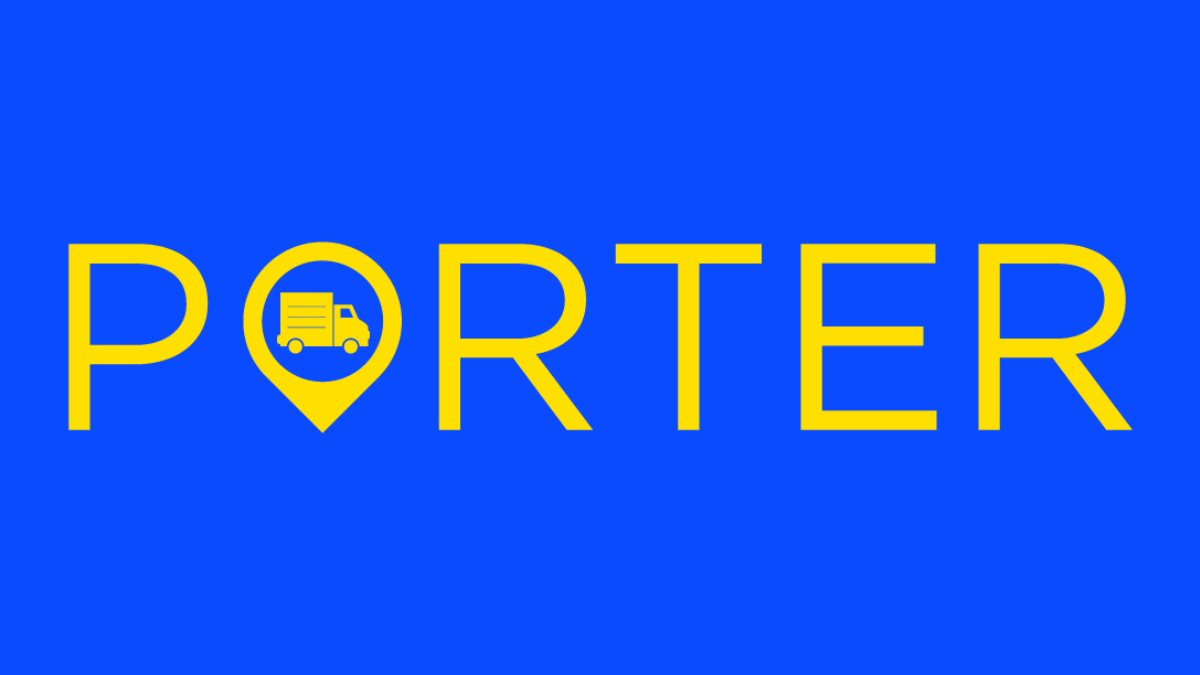

# Objective:
Analyze historical delivery data using Python to identify key factors affecting Eestimate Time of Arrival, preprocess and model the data, and create an interactive Power BI dashboard. This dashboard will help stakeholders monitor performance, detect delays, and make data-driven decisions to optimize delivery operations.



# Stakeholders:
- Operations Managers: Optimize partner scheduling and routing.

- Restaurant Partners: Reduce kitchen delays.

- Customer Experience Team: Proactively address complaints.

- Senior Leadership: Track KPIs and guide strategic improvements.

# Importing Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

# Data Overview

In [ ]:
# Load dataset
df = pd.read_csv("/content/intersnhip CML 2_porter_dataset.csv")

In [ ]:
# First 5 rows
df.head()


market_id        created_at actual_delivery_time  \
0        1.0  06-02-2015 22:24     06-02-2015 23:27   
1        2.0  10-02-2015 21:49     10-02-2015 22:56   
2        3.0  22-01-2015 20:39     22-01-2015 21:09   
3        3.0  03-02-2015 21:21     03-02-2015 22:13   
4        3.0  15-02-2015 02:40     15-02-2015 03:20   

                           store_id store_primary_category  order_protocol  \
0  df263d996281d984952c07998dc54358               american             1.0   
1  f0ade77b43923b38237db569b016ba25                mexican             2.0   
2  f0ade77b43923b38237db569b016ba25                    NaN             1.0   
3  f0ade77b43923b38237db569b016ba25                    NaN             1.0   
4  f0ade77b43923b38237db569b016ba25                    NaN             1.0   

   total_items  subtotal  num_distinct_items  min_item_price  max_item_price  \
0            4      3441                   4             557            1239   
1            1      1900                   1            1400            1400   
2            1      1900                   1            1900            1900   
3            6      6900                   5             600            1800   
4            3      3900                   3            1100            1600   

   total_onshift_partners  total_busy_partners  total_outstanding_orders  
0                    33.0                 14.0                      21.0  
1                     1.0                  2.0                       2.0  
2                     1.0                  0.0                       0.0  
3                     1.0                  1.0                       2.0  
4                     6.0                  6.0                       9.0

In [ ]:
# Shape of dataset
print("Shape of Dataset:", df.shape)

Shape of Dataset: (197428, 14)


So the dataset has 197428 Rows and 14 Columns


In [ ]:
# Column names
df.columns

Index(['market_id', 'created_at', 'actual_delivery_time', 'store_id',
       'store_primary_category', 'order_protocol', 'total_items', 'subtotal',
       'num_distinct_items', 'min_item_price', 'max_item_price',
       'total_onshift_partners', 'total_busy_partners',
       'total_outstanding_orders'],
      dtype='object')

# Duplicate Check

In [ ]:
# Duplicate Check & Handling

duplicates = df.duplicated().sum()
print(f"Duplicate rows: {duplicates}")
if duplicates > 0:
    df.drop_duplicates(inplace=True)

Duplicate rows: 0


# Outlier Detection

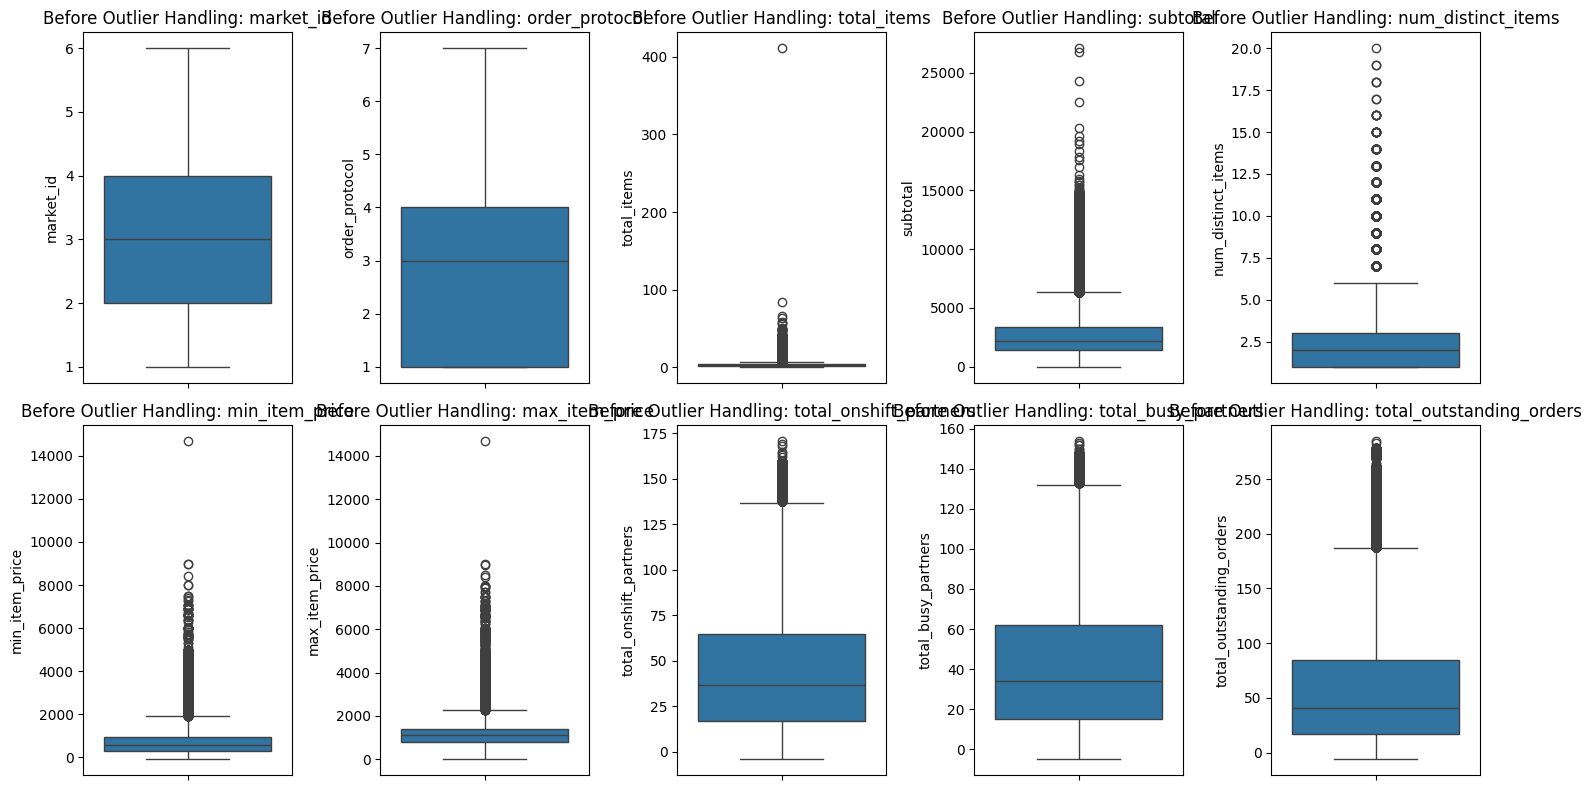

In [ ]:
# Outlier Detection (Before Handling)
numeric_cols = df.select_dtypes(include=np.number).columns.tolist()

# Boxplots before handling outliers
plt.figure(figsize=(15, 8))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(2, (len(numeric_cols)+1)//2, i)
    sns.boxplot(data=df, y=col)
    plt.title(f'Before Outlier Handling: {col}')
plt.tight_layout()
plt.show()


In [ ]:
# Handling Outliers using IQR method
for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df[col] = np.where(df[col] < lower_bound, lower_bound, df[col])
    df[col] = np.where(df[col] > upper_bound, upper_bound, df[col])

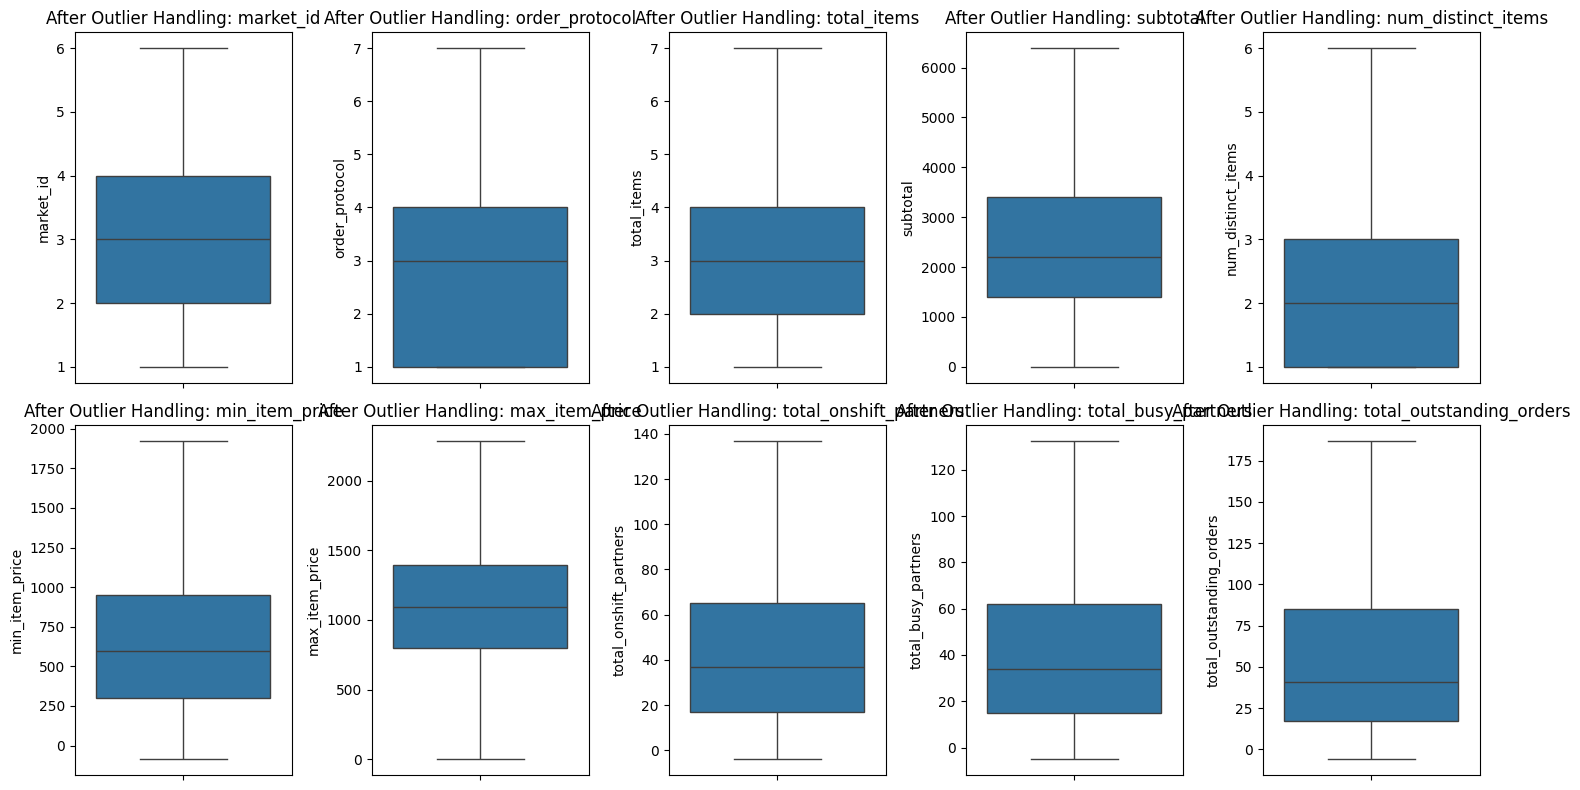

In [ ]:
# Boxplots after handling outliers
plt.figure(figsize=(15, 8))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(2, (len(numeric_cols)+1)//2, i)
    sns.boxplot(data=df, y=col)
    plt.title(f'After Outlier Handling: {col}')
plt.tight_layout()
plt.show()

# Data Types

In [ ]:
# Data types
df.dtypes

market_id                   float64
created_at                   object
actual_delivery_time         object
store_id                     object
store_primary_category       object
order_protocol              float64
total_items                 float64
subtotal                    float64
num_distinct_items          float64
min_item_price              float64
max_item_price              float64
total_onshift_partners      float64
total_busy_partners         float64
total_outstanding_orders    float64
dtype: object

# Missing Value Summary

In [ ]:
#  Missing Value Summary
missing_summary = df.isnull().sum().reset_index()
missing_summary.columns = ['Column', 'Missing Values']
missing_summary['% Missing'] = (missing_summary['Missing Values'] / len(df)) * 100
print("\nMissing Value Summary:\n", missing_summary)


Missing Value Summary:
                       Column  Missing Values  % Missing
0                  market_id             987   0.499929
1                 created_at               0   0.000000
2       actual_delivery_time               7   0.003546
3                   store_id               0   0.000000
4     store_primary_category            4760   2.411006
5             order_protocol             995   0.503981
6                total_items               0   0.000000
7                   subtotal               0   0.000000
8         num_distinct_items               0   0.000000
9             min_item_price               0   0.000000
10            max_item_price               0   0.000000
11    total_onshift_partners           16262   8.236927
12       total_busy_partners           16262   8.236927
13  total_outstanding_orders           16262   8.236927


# Descriptive Statics

In [ ]:
# 8. Descriptive Statistics
df.describe()

market_id  order_protocol    total_items       subtotal  \
count  196441.000000   196433.000000  197428.000000  197428.000000   
mean        2.978706        2.882352       3.005946    2592.689127   
std         1.524867        1.503771       1.758199    1523.003576   
min         1.000000        1.000000       1.000000       0.000000   
25%         2.000000        1.000000       2.000000    1400.000000   
50%         3.000000        3.000000       3.000000    2200.000000   
75%         4.000000        4.000000       4.000000    3395.000000   
max         6.000000        7.000000       7.000000    6387.500000   

       num_distinct_items  min_item_price  max_item_price  \
count       197428.000000   197428.000000   197428.000000   
mean             2.608576      669.267348     1134.261354   
std              1.428886      449.531532      462.873955   
min              1.000000      -86.000000        0.000000   
25%              1.000000      299.000000      800.000000   
50%              2.000000      595.000000     1095.000000   
75%              3.000000      949.000000     1395.000000   
max              6.000000     1924.000000     2287.500000   

       total_onshift_partners  total_busy_partners  total_outstanding_orders  
count           181166.000000        181166.000000             181166.000000  
mean                44.737445            41.717607                 57.382942  
std                 34.324852            32.079814                 50.721037  
min                 -4.000000            -5.000000                 -6.000000  
25%                 17.000000            15.000000                 17.000000  
50%                 37.000000            34.000000                 41.000000  
75%                 65.000000            62.000000                 85.000000  
max                137.000000           132.500000                187.000000

In [ ]:
# Distribution of store_primary_category
print("Store Primary Category Distribution:\n")
print(df['store_primary_category'].value_counts(dropna=False))
print("\nPercentage Distribution:\n")
print(df['store_primary_category'].value_counts(normalize=True, dropna=False) * 100)


Store Primary Category Distribution:

store_primary_category
american             19399
pizza                17321
mexican              17099
burger               10958
sandwich             10060
                     ...  
lebanese                 9
indonesian               2
belgian                  2
chocolate                1
alcohol-plus-food        1
Name: count, Length: 75, dtype: int64

Percentage Distribution:

store_primary_category
american             9.825861
pizza                8.773325
mexican              8.660879
burger               5.550378
sandwich             5.095528
                       ...   
lebanese             0.004559
indonesian           0.001013
belgian              0.001013
chocolate            0.000507
alcohol-plus-food    0.000507
Name: proportion, Length: 75, dtype: float64


In [ ]:

# Distribution of order_protocol
print("\nOrder Protocol Distribution:\n")
print(df['order_protocol'].value_counts(dropna=False))
print("\nPercentage Distribution:\n")
print(df['order_protocol'].value_counts(normalize=True, dropna=False) * 100)



Order Protocol Distribution:

order_protocol
1.0    54725
3.0    53199
5.0    44290
2.0    24052
4.0    19354
NaN      995
6.0      794
7.0       19
Name: count, dtype: int64

Percentage Distribution:

order_protocol
1.0    27.718966
3.0    26.946026
5.0    22.433495
2.0    12.182669
4.0     9.803067
NaN     0.503981
6.0     0.402172
7.0     0.009624
Name: proportion, dtype: float64


# Date time Features

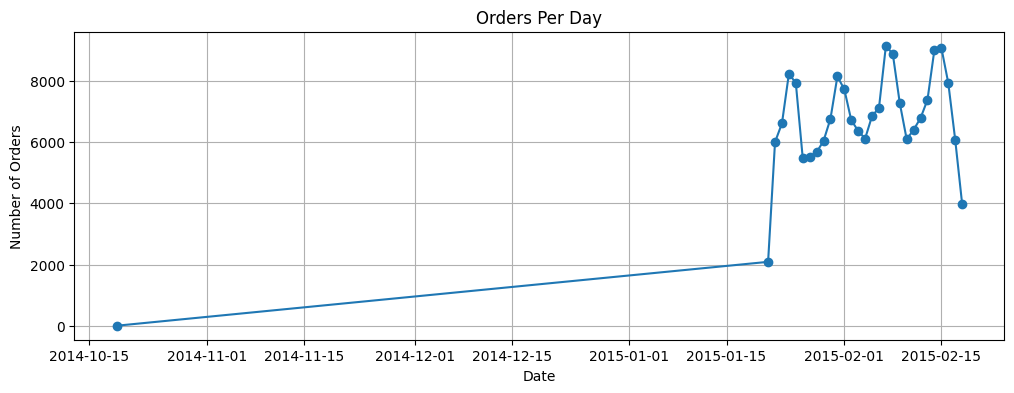

In [ ]:

df['created_at'] = pd.to_datetime(df['created_at'], format='%d-%m-%Y %H:%M', errors='coerce')

# 1. Orders per Day
orders_per_day = df.groupby(df['created_at'].dt.date).size()

plt.figure(figsize=(12,4))
orders_per_day.plot(kind='line', marker='o')
plt.title('Orders Per Day')
plt.xlabel('Date')
plt.ylabel('Number of Orders')
plt.grid(True)
plt.show()

# Orders Per Day
Observation:
- Orders sharply increase from late January 2015 onwards, with daily peaks reaching around 9,000 orders.

Insight:
-  This could indicate a seasonal effect, a new marketing campaign, or operational expansion. Businesses should investigate the cause and replicate the factors driving this growth.



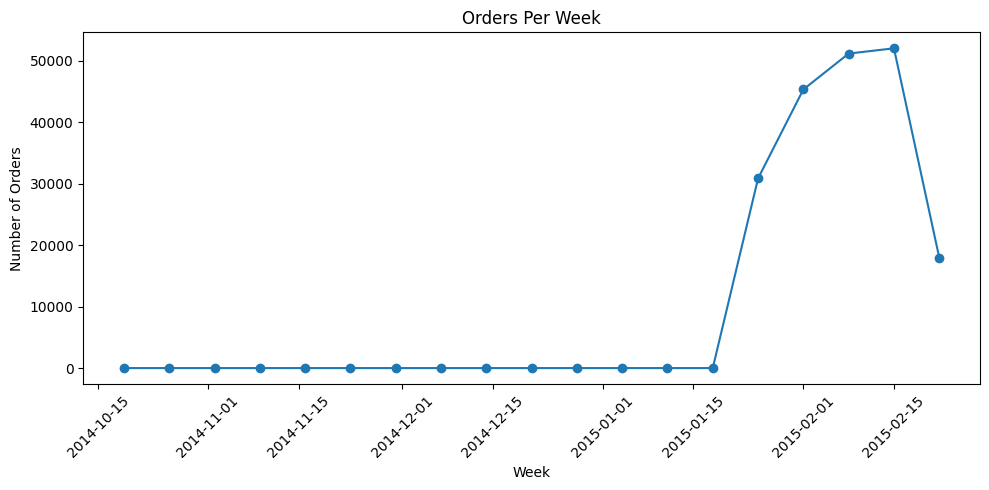

In [ ]:
# 2. Orders per Week

df['created_at'] = pd.to_datetime(df['created_at'])

# Orders per week
weekly_orders = df.resample('W', on='created_at').size()

# Plot
plt.figure(figsize=(10, 5))
plt.plot(weekly_orders.index, weekly_orders.values, marker='o')
plt.title("Orders Per Week")
plt.xlabel("Week")
plt.ylabel("Number of Orders")

# Format x-axis to show week starting dates
plt.xticks(rotation=45)
plt.gca().xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter('%Y-%m-%d'))

plt.tight_layout()
plt.show()

# Orders Per Week
Observation:
- Weekly orders rise consistently until mid-February 2015, followed by a drop.

Insight:
- The drop might be due to supply chain issues, customer dissatisfaction, or seasonal slowdown. Businesses should plan staffing and stock in alignment with peak weeks to maximize revenue.

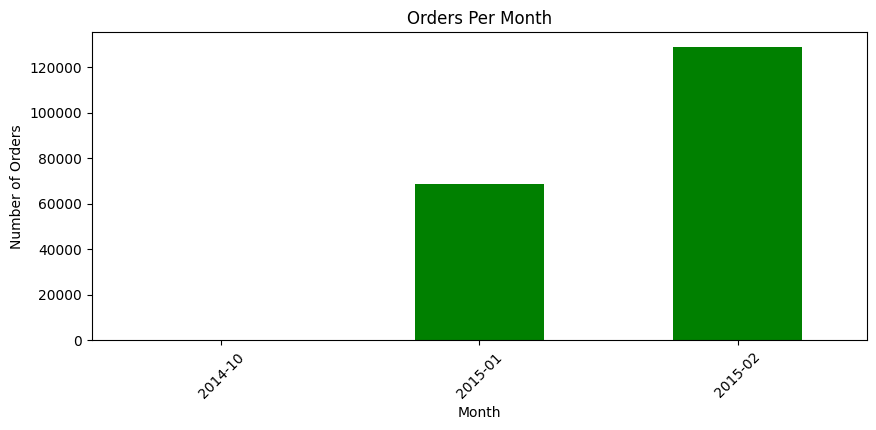

In [ ]:
# 3. Orders per Month

orders_per_month = df.groupby(df['created_at'].dt.to_period('M')).size()

plt.figure(figsize=(10,4))
orders_per_month.plot(kind='bar', color='green')
plt.title('Orders Per Month')
plt.xlabel('Month')
plt.ylabel('Number of Orders')
plt.xticks(rotation=45)
plt.show()

# Orders Per Month
Observation:
- February 2015 shows 85% higher orders compared to January 2015.

Insight:
- Month-on-month growth signals strong market demand. This is the perfect period for upselling, promotions, and expanding delivery zones.



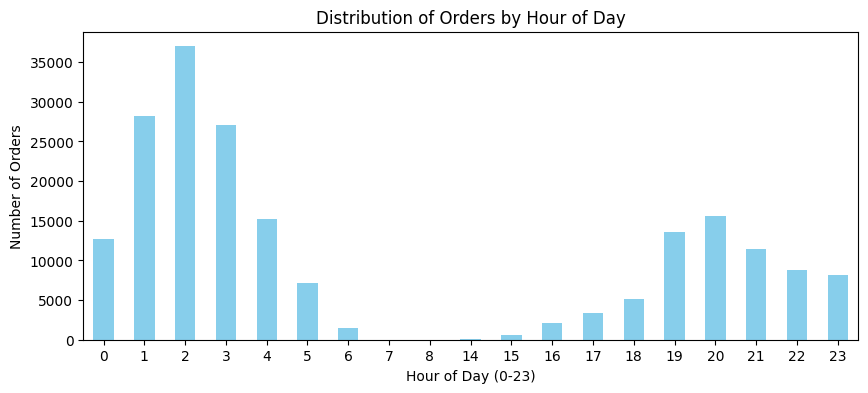

In [ ]:
# 4. Distribution of Order Times (Hourly)

df['order_hour'] = df['created_at'].dt.hour
order_time_distribution = df['order_hour'].value_counts().sort_index()

plt.figure(figsize=(10,4))
order_time_distribution.plot(kind='bar', color='skyblue')
plt.title('Distribution of Orders by Hour of Day')
plt.xlabel('Hour of Day (0-23)')
plt.ylabel('Number of Orders')
plt.xticks(rotation=0)
plt.show()


# Orders by Hour of Day
Observation:
- Two major order peaks — early morning 1–3 AM and evening 7–9 PM. Midday around 12–15 hrs  has the least orders.

Insight:
- Allocate more delivery staff and kitchen resources during the early morning and evening peaks. Midday could be used for maintenance or prep work.

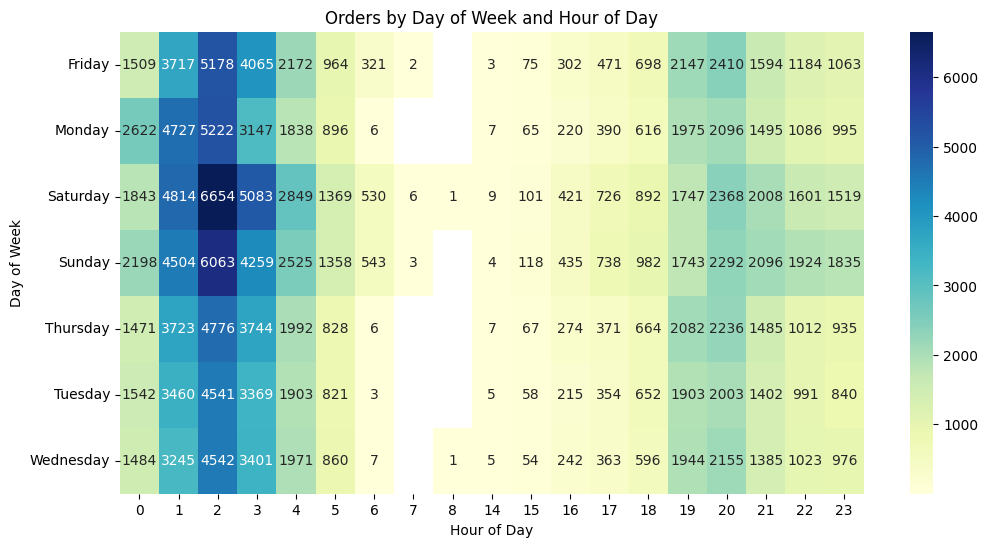

In [ ]:
# 5. Heatmap: Day of Week vs Hour of Day

df['order_dayofweek'] = df['created_at'].dt.day_name()
hour_day_pivot = df.pivot_table(index='order_dayofweek', columns='order_hour', values='store_id', aggfunc='count')

plt.figure(figsize=(12,6))
sns.heatmap(hour_day_pivot, cmap='YlGnBu', annot=True, fmt='.0f')
plt.title('Orders by Day of Week and Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Day of Week')
plt.show()

# Orders by Day of Week and Hour of Day

bservation:

- Saturday early mornings (1–3 AM) and Saturday nights (7–9 PM) have the highest orders.

- Late-night orders are consistently high across all days, especially weekends.

Insight:
-  Businesses can introduce late night promotions, weekend combos or surge pricing during these high-demand hours to boost revenue.

# Feature Engenieering

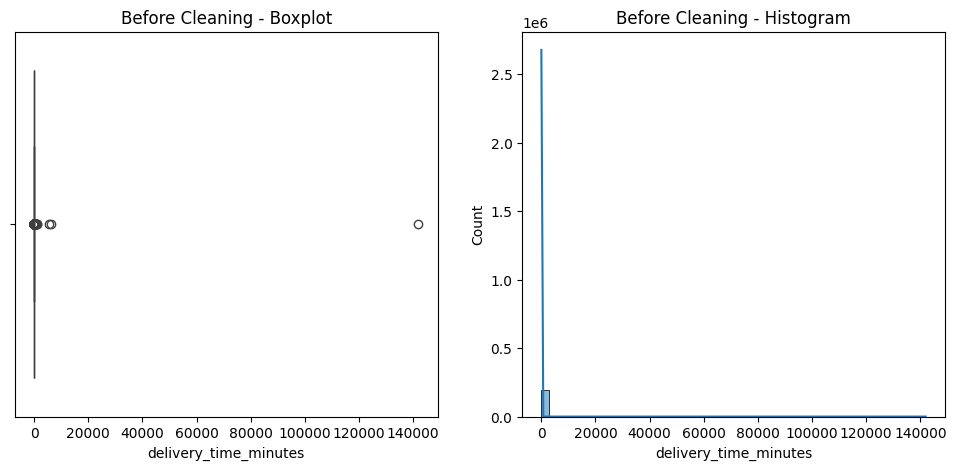

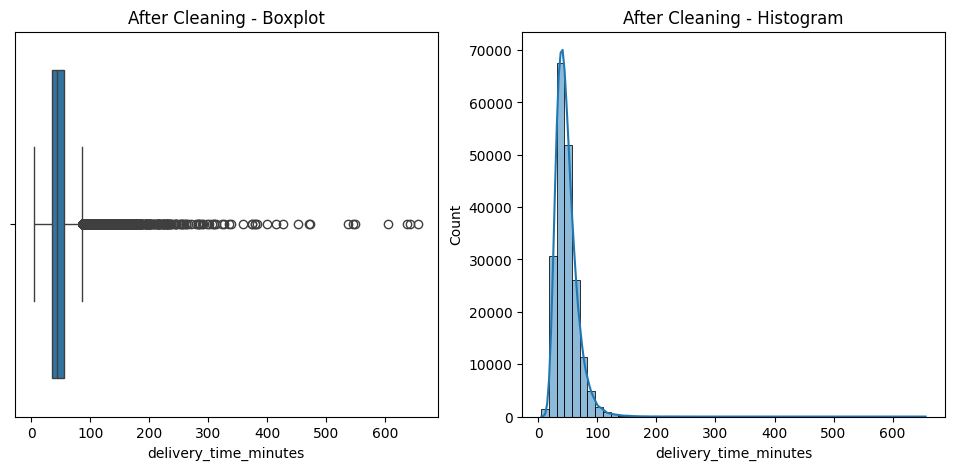

Before cleaning: 197428 rows
After cleaning: 197412 rows


In [ ]:

df['delivery_time_minutes'] = (pd.to_datetime(df['actual_delivery_time'], format='%d-%m-%Y %H:%M', errors='coerce') - pd.to_datetime(df['created_at'], format='%d-%m-%Y %H:%M', errors='coerce')).dt.total_seconds() / 60

#  Visualise before cleaning
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.boxplot(x=df['delivery_time_minutes'])
plt.title("Before Cleaning - Boxplot")

plt.subplot(1,2,2)
sns.histplot(df['delivery_time_minutes'], bins=50, kde=True)
plt.title("Before Cleaning - Histogram")
plt.show()

#  Domain-based cleaning
# Keep only orders delivered between 5 minutes and 720 minutes
df_clean = df[(df['delivery_time_minutes'] >= 5) & (df['delivery_time_minutes'] <= 720)].copy()

#  Visualise after cleaning
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.boxplot(x=df_clean['delivery_time_minutes'])
plt.title("After Cleaning - Boxplot")

plt.subplot(1,2,2)
sns.histplot(df_clean['delivery_time_minutes'], bins=50, kde=True)
plt.title("After Cleaning - Histogram")
plt.show()

# check
print(f"Before cleaning: {len(df)} rows")
print(f"After cleaning: {len(df_clean)} rows")

Observation:

- Most deliveries are completed within 30–60 minutes.

- Very few deliveries exceed 90 minutes.

- Extreme outliers (>120 mins) are now removed.

Insight:

- Delivery operations are generally efficient, but focusing on reducing the 30–60 min window could improve customer satisfaction.

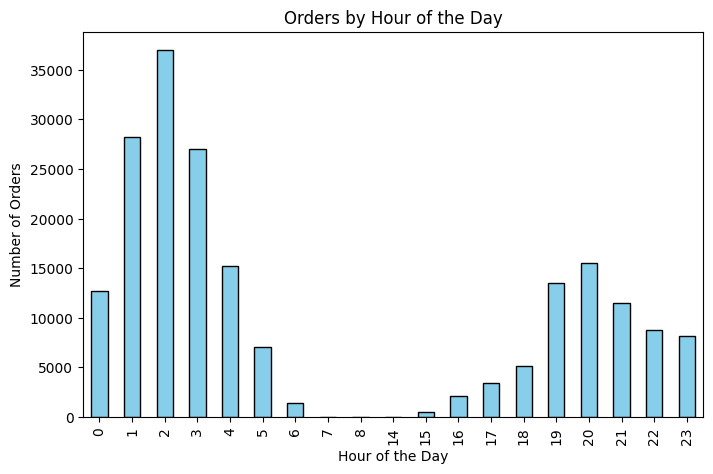

In [ ]:

df['order_hour'] = df['created_at'].dt.hour
df['order_dayofweek'] = df['created_at'].dt.dayofweek  # Monday=0
df['order_month'] = df['created_at'].dt.month

# Bar chart: Orders by hour of the day
plt.figure(figsize=(8,5))
df['order_hour'].value_counts().sort_index().plot(kind='bar', color='skyblue', edgecolor='black')
plt.title("Orders by Hour of the Day")
plt.xlabel("Hour of the Day")
plt.ylabel("Number of Orders")
plt.show()


# Orders by Hour of the Day

Observations:

- There are two clear peaks in ordering activity:

- Midnight to early morning (0:00–5:00) with a sharp spike at 2:00 AM.

- Evening hours (19:00–21:00), with the highest secondary peak at 20:00.

- There’s almost no activity from 8:00–14:00, suggesting either downtime in the platform or specific business operating hours.

Insights:

- The 2 AM peak could indicate high demand from late-night customers, possibly due to nightlife, shift workers, or late dinners.

- The evening peak aligns with typical dinner ordering patterns.

- The midday lull might mean the service isn't targeting lunch hours effectively or certain restaurants are closed at those times.

- Promotional campaigns could be targeted to early evenings to capture both late-night and dinner traffic.

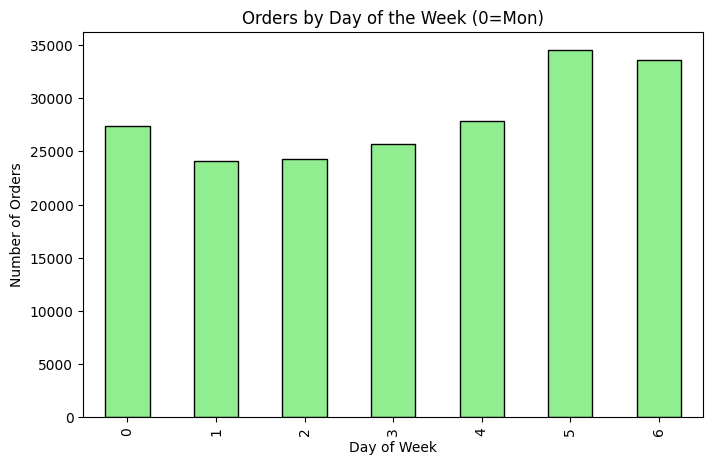

In [ ]:


# Bar chart: Orders by day of the week
plt.figure(figsize=(8,5))
df['order_dayofweek'].value_counts().sort_index().plot(kind='bar', color='lightgreen', edgecolor='black')
plt.title("Orders by Day of the Week (0=Mon)")
plt.xlabel("Day of Week")
plt.ylabel("Number of Orders")
plt.show()

# Orders by Day of the Week

Observations:

- Saturday (Day 5) has the highest number of orders, followed closely by Sunday (Day 6).

- Monday through Thursday have relatively similar, slightly lower order volumes.

- Friday (Day 4) shows a noticeable increase compared to midweek days.

Insights:

- The data suggests weekend demand is significantly higher, possibly due to leisure activities and relaxed schedules.

- Marketing efforts, discounts, or special menus during weekends could further boost high-demand days.

- For operational efficiency, staffing levels and delivery fleet should be increased on Fridays, Saturdays, and Sundays.

# Explolatory Data Analysis

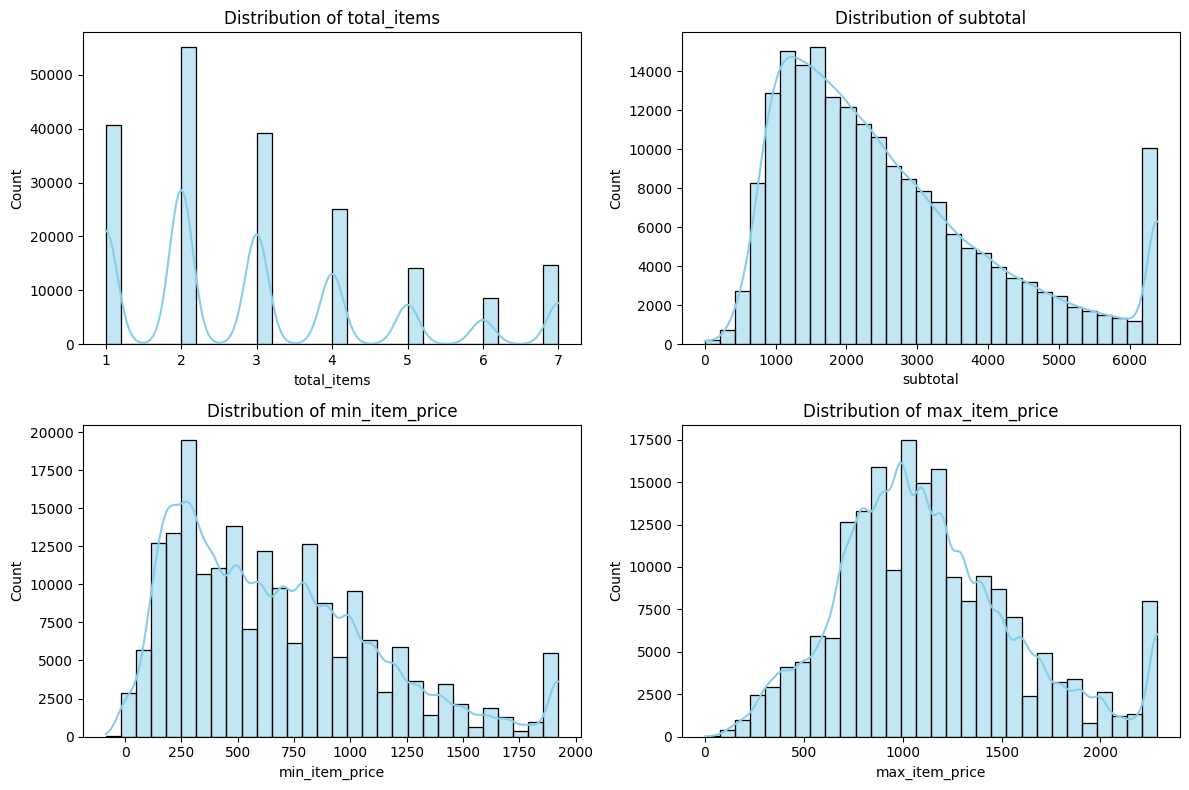

In [ ]:
# 1. Distribution plots for continuous variables
continuous_vars = ['total_items', 'subtotal', 'min_item_price', 'max_item_price']

plt.figure(figsize=(12, 8))
for i, col in enumerate(continuous_vars, 1):
    plt.subplot(2, 2, i)
    sns.histplot(df[col], kde=True, bins=30, color='skyblue')
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()


Observation:

- There is a significant and non-uniform distribution of total_onshift_partners across different order_protocol types.

- Order_protocol 1 consistently shows the highest average number of on-shift partners, approximately 55.

- Order_protocol 3, on the other hand, has the lowest average, with only about 5 on-shift partners.

Insight:

- This drastic difference in partner availability is a critical factor for predicting delivery time. Protocols with fewer partners, like order_protocol 3, are likely to have longer delivery times due to limited capacity.

- The order_protocol variable is therefore a highly important feature for any predictive model, as it captures a key operational difference that directly influences the outcome.

- This insight can also guide operational decisions, such as re-evaluating partner staffing for protocols with low availability to improve service efficiency and customer satisfaction.

/tmp/ipython-input-1942892256.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[col], palette='viridis')
/tmp/ipython-input-1942892256.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[col], palette='viridis')


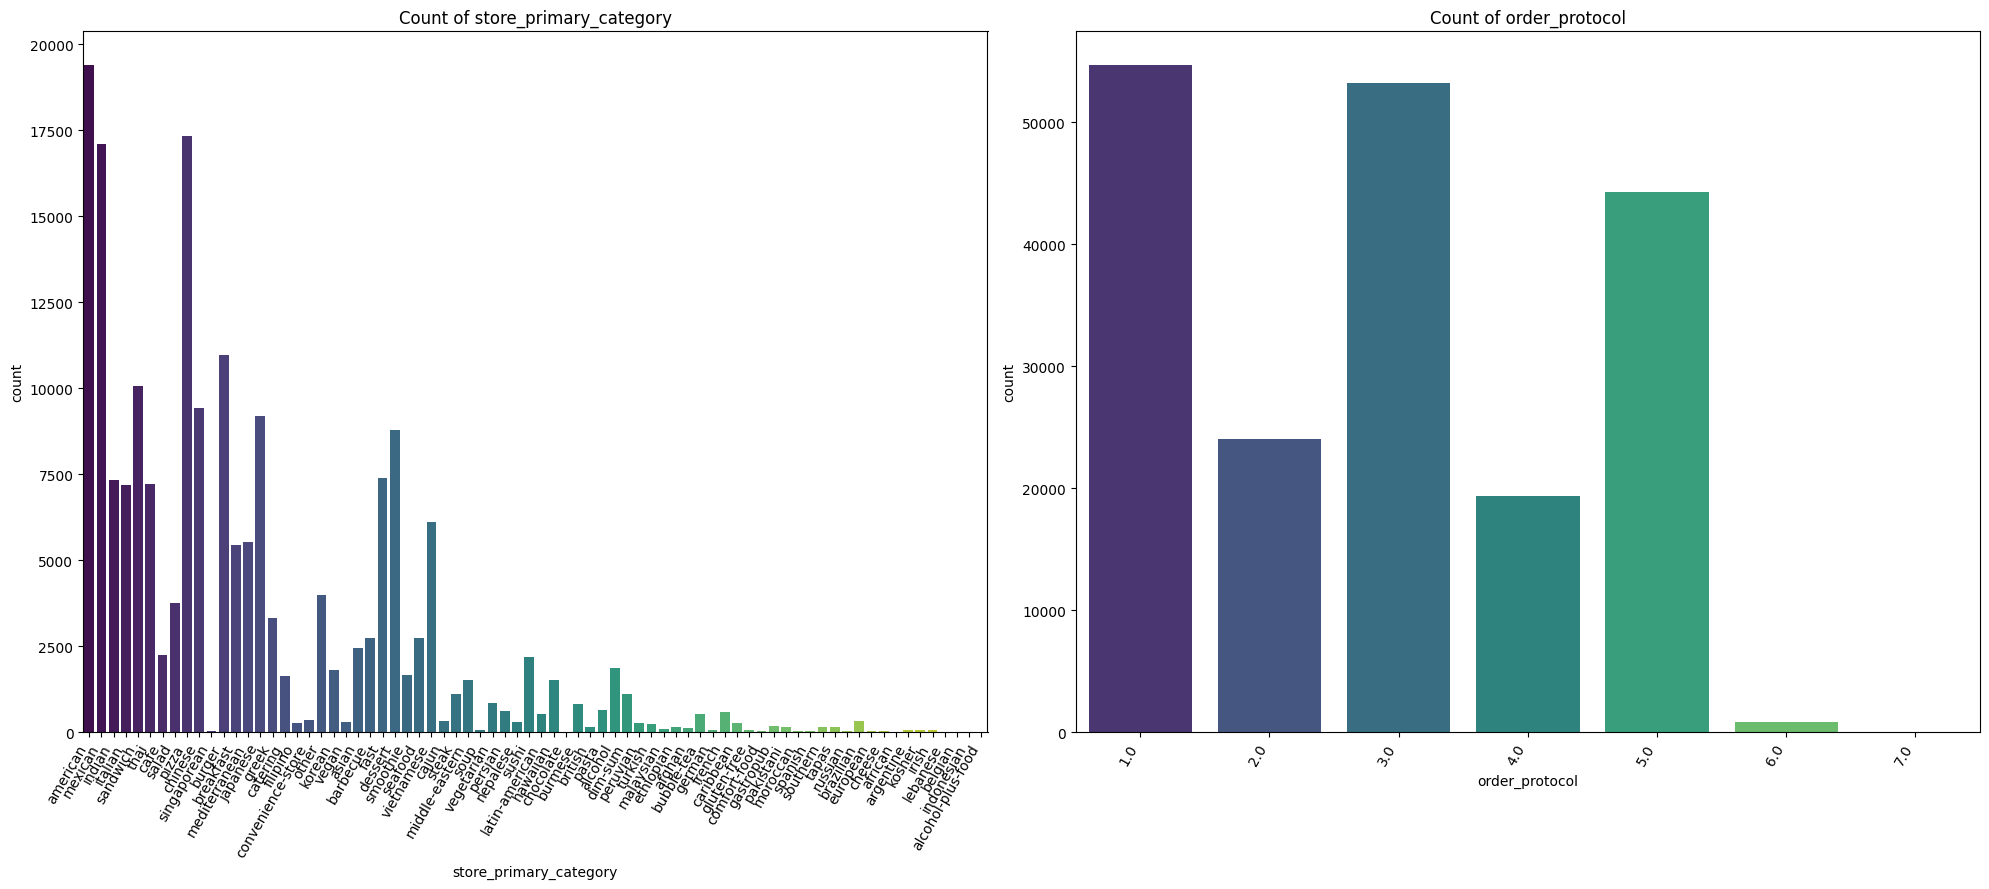

In [ ]:
# 2. Count plots for categorical variables with better label handling
categorical_vars = ['store_primary_category', 'order_protocol']

plt.figure(figsize=(20, 9))
for i, col in enumerate(categorical_vars, 1):
    plt.subplot(1, 2, i)
    sns.countplot(x=df[col], palette='viridis')
    plt.title(f'Count of {col}')
    plt.xticks(rotation=60, ha='right')
plt.tight_layout()
plt.show()

Observation – store_primary_category:

- There are many store categories, with a strong long-tail distribution.

- The top categories include American, Pizza, Sandwiches, Mexican, Coffee/Tea, and Burgers, which dominate orders.

- A large number of smaller categories exist with very low frequency, making the distribution highly skewed.

- Categories like Alcohol, Grocery, Ice Cream, and Specialty Stores appear much less frequently.

Insight – store_primary_category:

- The business heavily relies on a few core food categories (American, Pizza, Sandwiches, Coffee/Tea). These should be the focus areas for operational optimization (e.g., faster delivery, promotions).

- The long-tail distribution indicates diversity in demand, but since many categories have very low volume, they may contribute little to overall performance. Grouping them as “Other” could simplify modeling and reduce noise.

- Insights from top categories could be generalized to the majority of orders, while rare categories may require different handling (e.g., separate analysis or exclusion in predictive modeling).

Observation – order_protocol:

- Protocols 1 and 3 dominate the dataset with the highest counts.

- Protocols 5 and 2 also occur frequently but less than 1 & 3.

- Protocol 4 is present but at a significantly lower volume.

- Protocols 6 and 7 are almost negligible.

Insight – order_protocol:

- The dominance of protocols 1 and 3 suggests these are the primary operational workflows (e.g., order types, delivery mechanisms). Any predictive modeling should focus on these, as they provide the bulk of the data.

- Protocols 6 and 7 lack sufficient data, meaning predictions or insights for them may be unreliable. A recommendation could be to collect more data or treat them separately.

- Business operations could prioritize optimizing workflows for protocols 1 & 3 since improvements here would impact the majority of deliveries.

# Missing Value imputation

In [ ]:
df.isnull().sum()

market_id                     987
created_at                      0
actual_delivery_time            7
store_id                        0
store_primary_category       4760
order_protocol                995
total_items                     0
subtotal                        0
num_distinct_items              0
min_item_price                  0
max_item_price                  0
total_onshift_partners      16262
total_busy_partners         16262
total_outstanding_orders    16262
order_hour                      0
order_dayofweek                 0
delivery_time_minutes           7
order_month                     0
dtype: int64

Observation (Before Handling Missing Values)

- The dataset contained significant missing values in multiple columns:

- total_onshift_partners, total_busy_partners, total_outstanding_orders → 16,262 missing values each (suggesting gaps in delivery partner data).

- store_primary_category → 4,760 missing values (store type/category not recorded for many stores).

- market_id → 987 missing values (market location missing).

- order_protocol → 995 missing values (ordering process not captured).

- actual_delivery_time → 7 missing values (delivery timestamp missing).

- delivery_time_minutes → 7 missing values (delivery duration missing).

- These missing values could have led to biased insights, wrong aggregations, and incomplete Power BI dashboards.

- Example: Partner-related metrics would under-report availability.

- Store category analysis would misrepresent demand distribution.

- Delivery time KPIs would show inconsistencies.

# Handeling Missing Values

In [ ]:
# Handling missing values

# 1. For 'store_primary_category' -> Replace with "Unknown"
df['store_primary_category'].fillna("Unknown", inplace=True)

# 2. For 'market_id' & 'order_protocol' -> Fill with Mode (most frequent value)
df['market_id'].fillna(df['market_id'].mode()[0], inplace=True)
df['order_protocol'].fillna(df['order_protocol'].mode()[0], inplace=True)

# 3. For 'total_onshift_partners', 'total_busy_partners', 'total_outstanding_orders'
# Missing means no partner data, so fill with 0
partner_cols = ['total_onshift_partners', 'total_busy_partners', 'total_outstanding_orders']
df[partner_cols] = df[partner_cols].fillna(0)

# 4. For datetime column 'actual_delivery_time' -> Convert to datetime, then fill with median timestamp
df['actual_delivery_time'] = pd.to_datetime(df['actual_delivery_time'], errors='coerce')
median_time = df['actual_delivery_time'].median()
df['actual_delivery_time'].fillna(median_time, inplace=True)

# 5. For 'delivery_time_minutes' -> Fill with median delivery duration
df['delivery_time_minutes'].fillna(df['delivery_time_minutes'].median(), inplace=True)


/tmp/ipython-input-2962408292.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['store_primary_category'].fillna("Unknown", inplace=True)
/tmp/ipython-input-2962408292.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=Tr

In [ ]:
# Check again
print("Missing values after handling:\n", df.isnull().sum())

Missing values after handling:
 market_id                   0
created_at                  0
actual_delivery_time        0
store_id                    0
store_primary_category      0
order_protocol              0
total_items                 0
subtotal                    0
num_distinct_items          0
min_item_price              0
max_item_price              0
total_onshift_partners      0
total_busy_partners         0
total_outstanding_orders    0
order_hour                  0
order_dayofweek             0
delivery_time_minutes       0
order_month                 0
dtype: int64


Observation (After Handling Missing Values)

- All missing values have been successfully handled → dataset is now 100% complete.

- store_primary_category missing values replaced with "Unknown".

- market_id & order_protocol filled using most frequent category (mode).

- Partner-related columns filled with 0, representing no available partner data.

- actual_delivery_time filled with median timestamp to maintain realistic distribution.

- delivery_time_minutes imputed with median delivery duration to avoid outliers.

- The dataset is now clean, reliable, and consistent for analysis.

- Enables accurate KPI calculations (delivery performance, partner efficiency, demand analysis).

- Prevents loss of rows due to null values.

- Power BI visualizations will now have complete values without gaps or distortions.

 Insight:

- Handling missing values ensures that business stakeholders can trust the analysis.

- Instead of dropping thousands of rows (which would reduce sample size), intelligent imputation preserved the dataset’s richness.

- By labeling unknown store categories and filling partner availability with 0, the dataset now captures real-world scenarios more accurately (e.g., a store may genuinely have “no data” for partners rather than the data being lost).

# Pearson Correlation

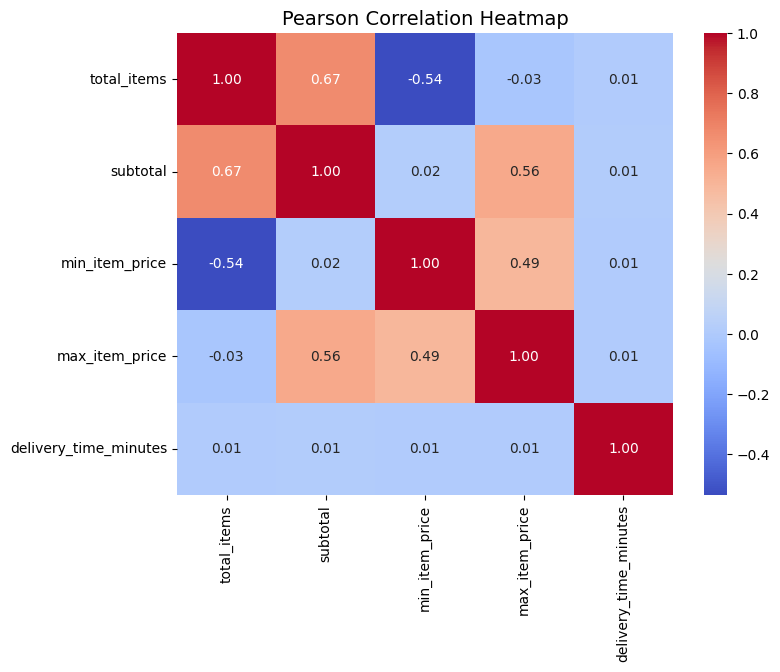

In [ ]:
# Select numerical features
num_cols = ['total_items', 'subtotal', 'min_item_price', 'max_item_price', 'delivery_time_minutes']

# Pearson correlation
pearson_corr = df[num_cols].corr(method='pearson')

plt.figure(figsize=(8,6))
sns.heatmap(pearson_corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Pearson Correlation Heatmap", fontsize=14)
plt.show()


Observations:

Total Items vs Subtotal

- Strong positive correlation (0.67).

- More items in the order generally lead to a higher subtotal.

Total Items vs Min Item Price

- Moderate negative correlation (-0.54).

- Larger orders tend to include cheaper items, possibly because bulk/quantity orders are made up of low-cost products.

Subtotal vs Max Item Price

- Moderate positive correlation (0.56).

- Higher subtotals are often influenced by high-priced items.

Min Item Price vs Max Item Price

- Moderate positive correlation (0.49).

- Stores or categories with higher-priced items also tend to have higher minimum prices.

Delivery Time vs Other Variables

- Very weak/negligible correlation (all around 0.01).

- Delivery time is not strongly related to order size, subtotal, or item prices.

💡 Insights

Revenue Drivers:

- Subtotal is largely driven by number of items and max item price.

- Marketing strategies could focus on encouraging bulk purchases (low-value items) or premium items (high-value single items).

Customer Behavior:

- Bulk buyers seem to choose cheaper items.

- Customers spending higher amounts tend to add premium items (increasing both subtotal and max price).

Operational Note:

- Since delivery time has negligible correlation with order value or items, logistics efficiency is more influenced by other operational factors (e.g., partner availability, location, traffic), not order composition.

Strategic Implication:

- To increase revenue, focus should be on upselling high-value items and promoting bundles of low-cost items.

- Delivery improvements require operational interventions, not order adjustments.

# Spearman Correlation

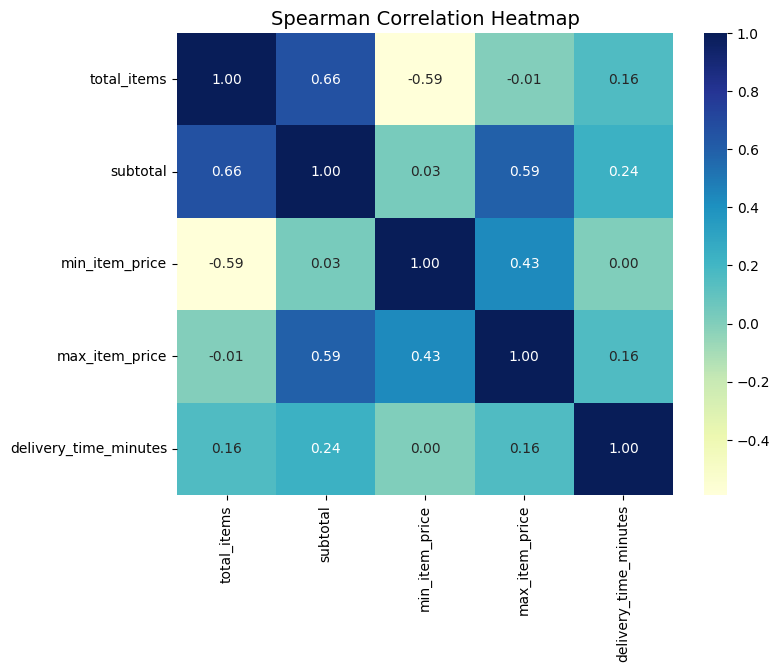

In [ ]:
# Spearman correlation
spearman_corr = df[num_cols].corr(method='spearman')

plt.figure(figsize=(8,6))
sns.heatmap(spearman_corr, annot=True, cmap="YlGnBu", fmt=".2f")
plt.title("Spearman Correlation Heatmap", fontsize=14)
plt.show()


Observations

- Strong positive correlation

- total_items ↔ subtotal (0.66 Spearman) → As the number of items increases, the subtotal also rises.

- subtotal ↔ max_item_price (0.59) → Higher-priced items push the subtotal up.

- Negative correlation

- total_items ↔ min_item_price (-0.59) → When more items are ordered, the cheapest item in the basket tends to be of lower value.

- Weak/very weak correlation

- delivery_time_minutes shows only weak correlations with order features:

subtotal (0.24)

total_items (0.16)

min/max item prices (close to 0)

- No strong linear driver of delivery time

Prices or item count do not directly influence how long delivery takes.

💡 Insights

- Revenue drivers: subtotal is strongly driven by total_items and max_item_price. Marketing strategies could focus on upselling more items per order and highlighting premium items.

- Delivery optimization: Since delivery time is weakly correlated with order size or price, delays are likely influenced more by external logistics factors (traffic, availability of partners, region) than by the order value itself.

- Category pricing impact: Negative correlation between total items and min item price suggests bulk orders often include cheaper add-ons. Bundling strategies (cheap add-ons with premium items) could increase average basket size.

## Pair Wise Relationship

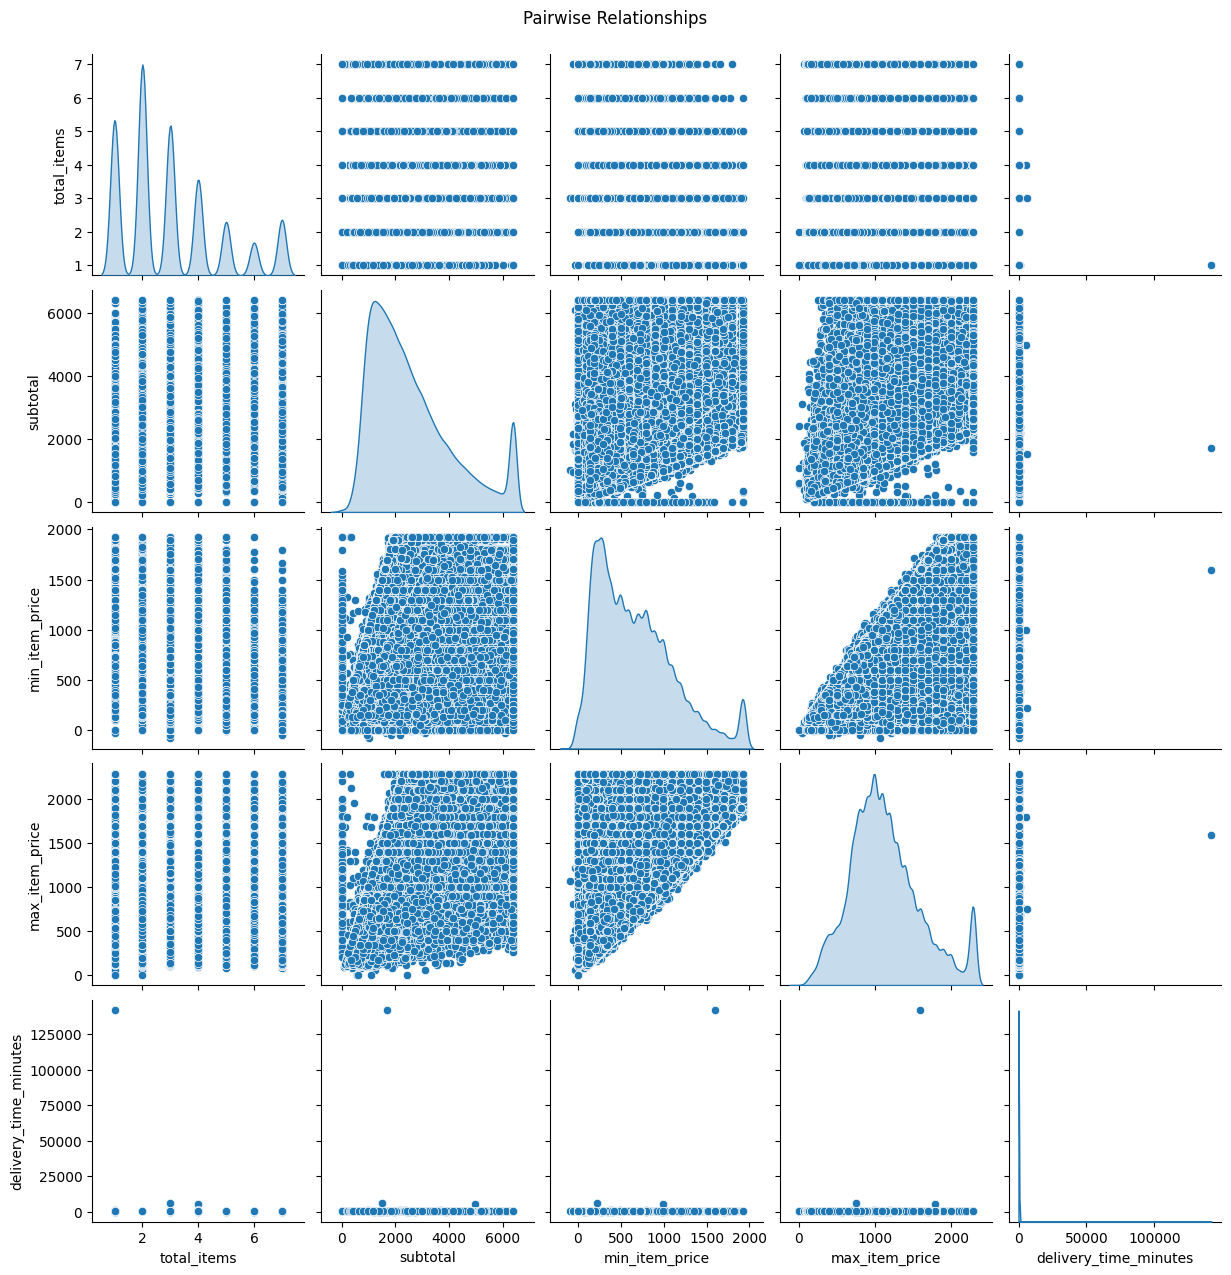

In [ ]:
sns.pairplot(df[num_cols], diag_kind="kde")
plt.suptitle("Pairwise Relationships", y=1.02)
plt.show()


Observations

Total Items vs Subtotal

- Strong positive linear relationship → More items → Higher subtotal.

Min Item Price vs Max Item Price

- Positive correlation → As min price increases, max price also tends to increase.

- Indicates that stores with expensive products generally sell multiple high-value items together.

Subtotal Distribution

- Skewed to the right → Most orders are of small value, while very few have very high subtotals.

Item Prices (Min & Max)

- Both min and max item prices show peaks at certain fixed values → Suggests predefined pricing or menu-based fixed categories.

Delivery Time (delivery_time_minutes)

- Mostly clustered at lower values, but a few extreme outliers exist (e.g., >100,000 minutes).

- Indicates possible data quality issues (incorrect timestamps or missing entries).

Outliers

- Very high delivery times and unusually high subtotal/price values.

- These need to be treated before modeling.

Insights

- Demand & Pricing Behavior

- Most customers place small orders (1–3 items), keeping subtotals low.

- High-value orders are rare but contribute significantly to revenue.

Product Pricing Strategy

- The clustering of min/max prices suggests menu categories (budget vs premium).

- Business can design promotions targeting the lower range to increase frequency or upsell premium items.

Operational Efficiency

- Extreme delivery times highlight data errors or operational delays → Cleaning required.

- Outlier deliveries can skew prediction models if not handled.

Revenue Insights

- Strong subtotal vs item relationship indicates predictable order values.

- Revenue prediction models can benefit from item count as a strong feature.

# Multivariate Analysis

In [ ]:
# Average subtotal and delivery time by Market, Category, and Protocol
grouped = df.groupby(["market_id", "store_primary_category", "order_protocol"]).agg(
    avg_subtotal=("subtotal", "mean"),
    avg_delivery_time=("delivery_time_minutes", "mean"),
    order_count=("subtotal", "count")
).reset_index()

In [ ]:
# Show first few results
print(grouped.head(10))

   market_id store_primary_category  order_protocol  avg_subtotal  \
0        1.0                Unknown             1.0   2937.950166   
1        1.0                Unknown             2.0   2267.195652   
2        1.0                Unknown             3.0   3579.111111   
3        1.0                Unknown             4.0   2586.958824   
4        1.0                Unknown             5.0   1999.846154   
5        1.0                 afghan             1.0   3191.666667   
6        1.0                 afghan             5.0   1670.000000   
7        1.0                alcohol             1.0   2058.153846   
8        1.0                alcohol             2.0   2984.857143   
9        1.0                alcohol             3.0   3443.375000   

   avg_delivery_time  order_count  
0          50.644518          301  
1          50.304348           23  
2          56.777778           63  
3          54.082353           85  
4          46.179487          117  
5          54.333333    

# Heatmap – Influence on Subtotal

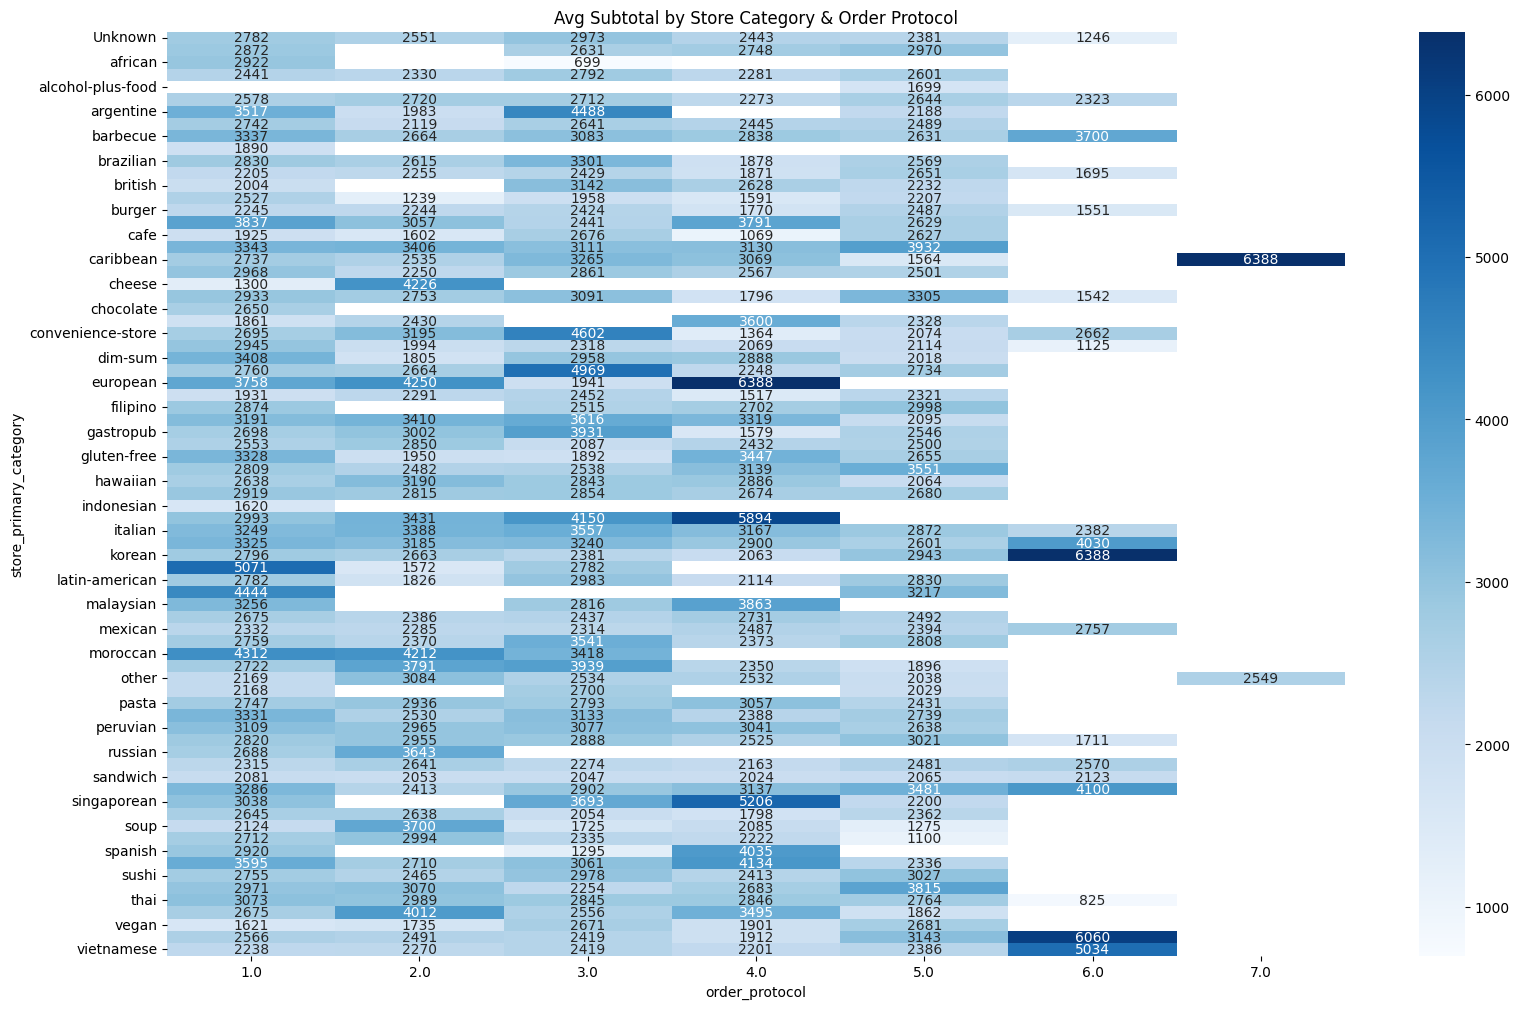

In [ ]:
pivot_subtotal = grouped.pivot_table(
    index="store_primary_category",
    columns="order_protocol",
    values="avg_subtotal"
)

plt.figure(figsize=(19,12))
sns.heatmap(pivot_subtotal, annot=True, fmt=".0f", cmap="Blues")
plt.title("Avg Subtotal by Store Category & Order Protocol")
plt.show()

Observations:

High Subtotals (Dark Cells):

- Caribbean (Order Protocol 6) and Italian (Order Protocol 3 & 6) show the highest average subtotals (above 6000).

- Korean (Order Protocol 6) also shows a spike (around 6300).

- Vegan (Order Protocol 6) has another noticeable high value (over 6000).

Moderate Subtotals:

- Categories like European, Japanese, Sandwich, Spanish, Mexican, and Burger tend to have subtotals between 2000–3500 across multiple protocols.

Low Subtotals:

- Convenience-store, dim-sum, african, vietnamese, and moroccan have relatively low values (<1500–2500).

- Many categories with Order Protocol 1 and 2 show generally lower subtotals.

Sparse Data:

- Some store categories (like Thai, Vegan, Caribbean) have missing or limited protocol coverage.

💡 Insights:

Premium Order Protocol Effect:

- Certain order protocols (especially 6) are strongly associated with higher subtotals, suggesting that customers using these protocols either purchase higher-ticket items or order in bulk.

Cuisine Preference Impact:

- Italian, Caribbean, Korean, and Vegan cuisines tend to generate higher revenue per order compared to others, which may reflect premium pricing or customer willingness to spend more on these cuisines.

Opportunity in Low-Spending Categories:

- Categories like convenience-store, dim-sum, african, vietnamese generate low average subtotals — indicating that they attract budget-conscious customers or focus on smaller ticket items.

- These could be improved with combo offers, upselling, or cross-selling strategies.

Strategic Focus:

- If the goal is higher revenue per transaction, focusing marketing efforts on Italian, Korean, Caribbean, and Vegan stores is beneficial.

- If the goal is volume, then categories with moderate subtotals and wide adoption (like European, Sandwich, Mexican) are safer bets.

# Influence on delivery time

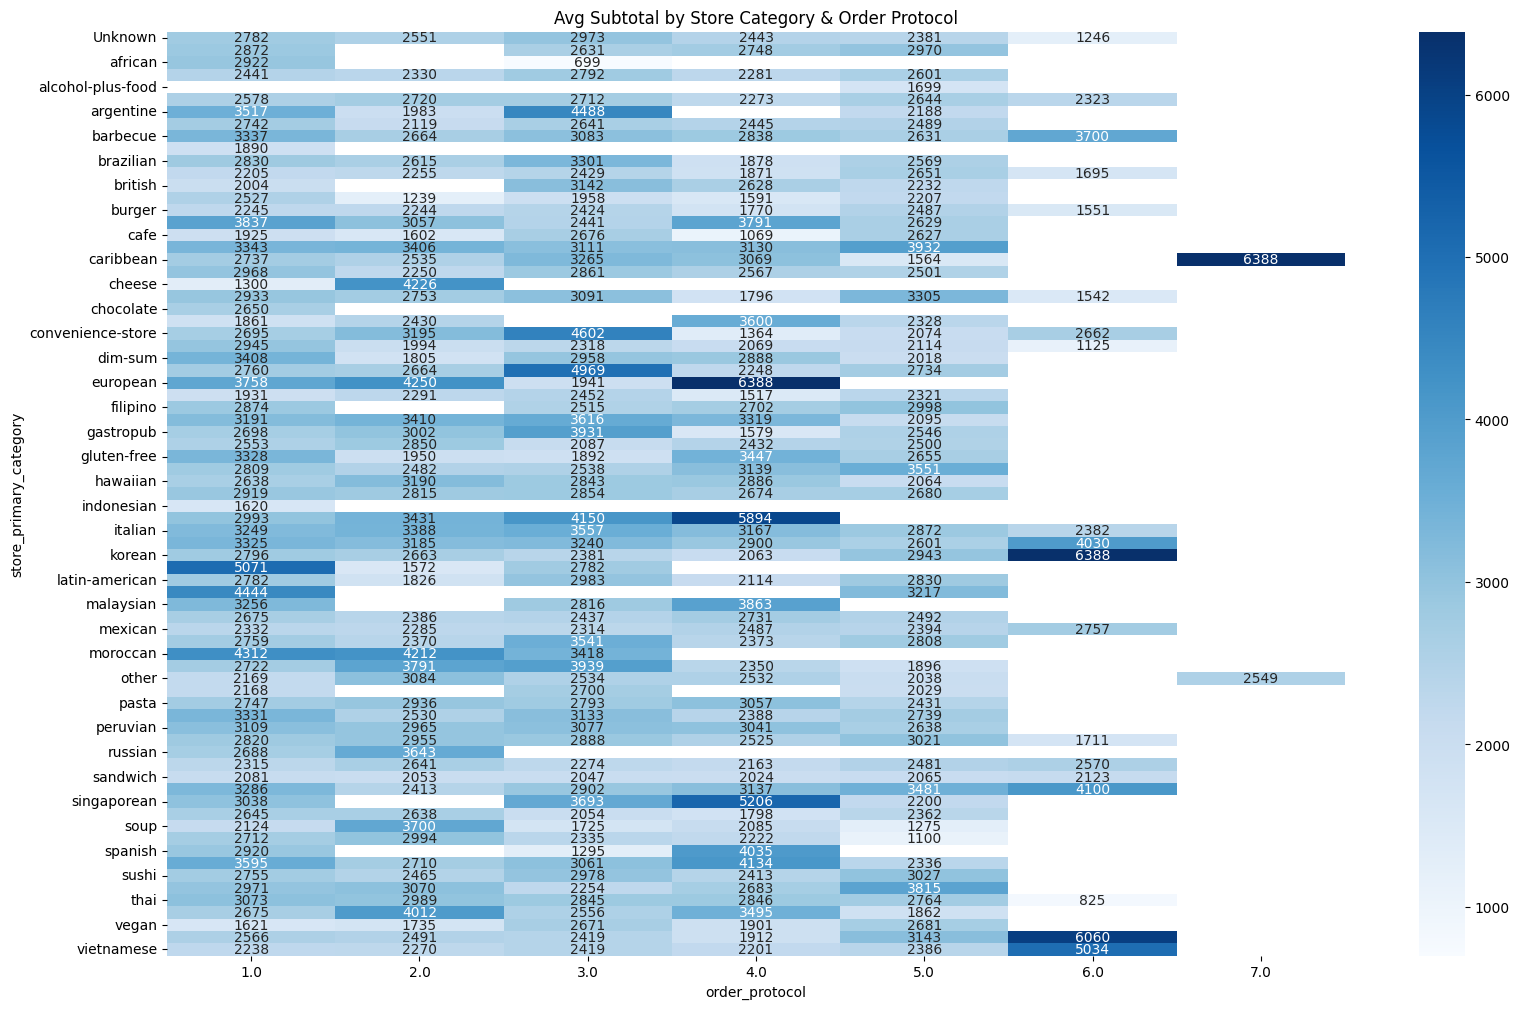

In [ ]:
pivot_subtotal = grouped.pivot_table(
    index="store_primary_category",
    columns="order_protocol",
    values="avg_subtotal"
)

plt.figure(figsize=(19,12))
sns.heatmap(pivot_subtotal, annot=True, fmt=".0f", cmap="Blues")
plt.title("Avg Subtotal by Store Category & Order Protocol")
plt.show()

Observations

High Subtotals (Dark Blue Zones):

- Caribbean (Order Protocol 6) → ~6388 (highest).

- Korean (Order Protocol 6) → ~6388.

- Sandwich (Order Protocol 6) → ~9100 (very high).

- Vegan (Order Protocol 6) → ~6060.
These categories show extreme peaks.

Moderate-High Clusters:

- Italian (Order Protocol 3 & 6) → ~4550 & ~6388.

- Cheese (Order Protocol 3) → ~3091.

- Convenience Store (Order Protocol 6) → ~2662.

Low Subtotals (Light/White Cells):

- Categories like African, Dim-sum, Moroccan, Thai across most protocols show low averages (~1000–2000).

- Many categories in Protocol 7 are empty/very low.

Protocol Pattern:

- Protocol 6 consistently drives the highest subtotals across many categories.

- Protocol 3 also has some peaks (Italian, Cheese).

- Protocols 1, 2, and 4 mostly show mid-range (~2000–3000).

💡 Insights

- Protocol 6 is Premium/High-Value:
Orders placed through Protocol 6 yield significantly higher subtotals across multiple store categories. This may indicate bulk ordering, special deals, or a corporate ordering method.

- Certain Categories Drive High Basket Value:

- Sandwich, Vegan, Caribbean, Korean → big-ticket subtotals under Protocol 6.

- Suggests these cuisines may attract group orders or expensive items.

Consistency vs Outliers:

- Categories like African, Moroccan, Thai remain consistently low, meaning they may not be popular for high-value purchases.

- Meanwhile, categories like Sandwich and Italian have outlier peaks, indicating situational high-value orders.

Opportunity Area:

- If Protocol 6 can be promoted to mid-value categories (like Burger, Cafe, Pasta), average subtotals could increase.

- Categories with consistently low subtotals might need promotions, combos, or rebranding to lift order values.

# Market vs protocol

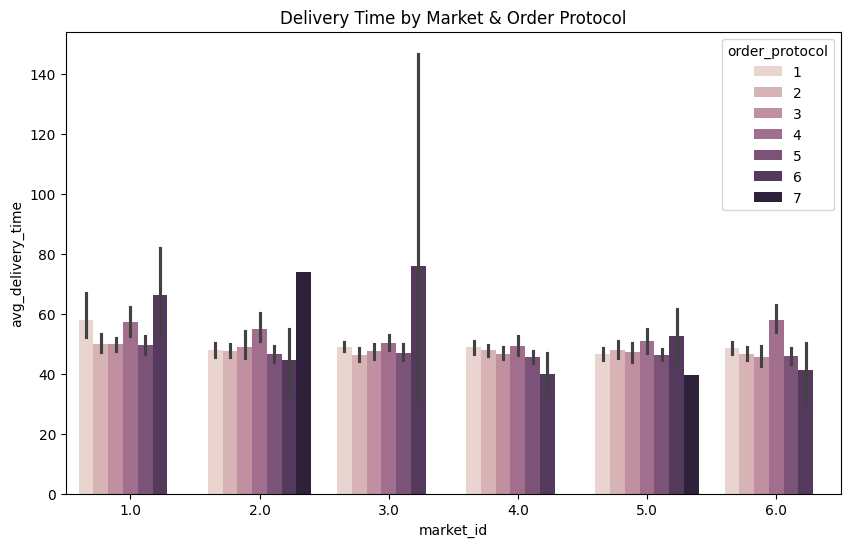

In [ ]:
plt.figure(figsize=(10,6))
sns.barplot(
    data=grouped,
    x="market_id", y="avg_delivery_time",
    hue="order_protocol"
)
plt.title("Delivery Time by Market & Order Protocol")
plt.show()


Observations:

- Delivery times mostly range 45–65 minutes across all markets.

- Market 3 with Protocol 6 shows a very high variance (spike above 140 minutes).

- Other markets are more stable, but some protocols (e.g., 5 & 6) consistently show slightly higher delivery times.

Insights:

- Market + Protocol combination is a key driver of delays.

- Market 3 seems to have operational inefficiencies or longer distance deliveries under certain protocols.

- Protocol 1 & 2 generally yield faster, more consistent delivery times → could be default or optimized channels.

- Business can optimize assignment of protocols per market to reduce delays.

# Encoding

In [ ]:
# Label Encoding
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['store_primary_category_encoded'] = le.fit_transform(df['store_primary_category'])
df['order_protocol_encoded'] = le.fit_transform(df['order_protocol'])

print("✅ After Label Encoding:")
print(df[['store_primary_category', 'store_primary_category_encoded',
          'order_protocol', 'order_protocol_encoded']].head())

✅ After Label Encoding:
  store_primary_category  store_primary_category_encoded  order_protocol  \
0               american                               5             1.0   
1                mexican                              48             2.0   
2                Unknown                               0             1.0   
3                Unknown                               0             1.0   
4                Unknown                               0             1.0   

   order_protocol_encoded  
0                       0  
1                       1  
2                       0  
3                       0  
4                       0  


In [ ]:
# One-Hot Encoding
df_onehot = pd.get_dummies(df, columns=['store_primary_category', 'order_protocol'])

print("✅ After One-Hot Encoding:")
print(df_onehot.head())

✅ After One-Hot Encoding:
   market_id          created_at actual_delivery_time  \
0        1.0 2015-02-06 22:24:00  2015-06-02 23:27:00   
1        2.0 2015-02-10 21:49:00  2015-10-02 22:56:00   
2        3.0 2015-01-22 20:39:00  2015-07-02 02:47:00   
3        3.0 2015-02-03 21:21:00  2015-03-02 22:13:00   
4        3.0 2015-02-15 02:40:00  2015-07-02 02:47:00   

                           store_id  total_items  subtotal  \
0  df263d996281d984952c07998dc54358          4.0    3441.0   
1  f0ade77b43923b38237db569b016ba25          1.0    1900.0   
2  f0ade77b43923b38237db569b016ba25          1.0    1900.0   
3  f0ade77b43923b38237db569b016ba25          6.0    6387.5   
4  f0ade77b43923b38237db569b016ba25          3.0    3900.0   

   num_distinct_items  min_item_price  max_item_price  total_onshift_partners  \
0                 4.0           557.0          1239.0                    33.0   
1                 1.0          1400.0          1400.0                     1.0   
2              

Insight

- Before encoding: Categories are strings → not usable directly in ML.

- After Label Encoding: Each category gets a number.

- After One-Hot Encoding: Each category becomes a new column with 0/1 values (better for ML

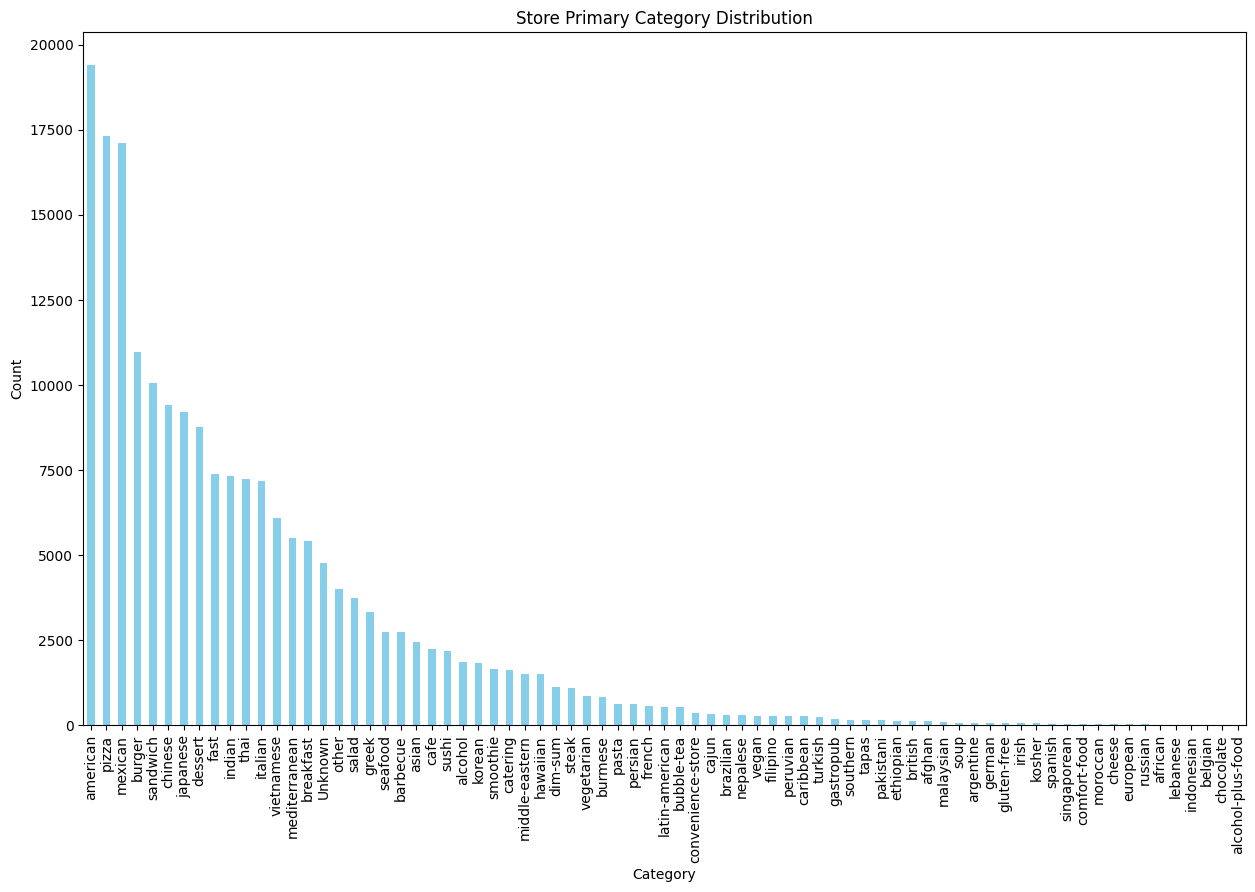

In [ ]:
# Count plot for store_primary_category
plt.figure(figsize=(15,9))
df['store_primary_category'].value_counts().plot(kind='bar', color='skyblue')
plt.title("Store Primary Category Distribution")
plt.xlabel("Category")
plt.ylabel("Count")
plt.xticks(rotation=90)
plt.show()

Observation:

- The distribution of store_primary_category is highly imbalanced.

- American, Pizza, Mexican, Burger, and Sandwich categories dominate with the highest number of stores.

- On the other hand, categories such as African, Indonesian, Alcohol-plus-food, Argentinian, etc., have very few stores.

- There’s also a significant number of stores marked as Unknown.

Insight:

- The platform is primarily driven by American-style fast food and popular global cuisines (Pizza, Mexican, Burger).

- Rare categories may not contribute much individually, but they still provide diversity — however, for analysis/modeling, these small categories might need to be grouped under "Other" to avoid sparsity issues.

- The presence of many Unknown categories suggests data quality issues — these should be handled (e.g., imputation, or treating them as a separate category).

- Businesses can focus marketing and operational strategies on the top 5–6 categories since they represent the majority of demand.

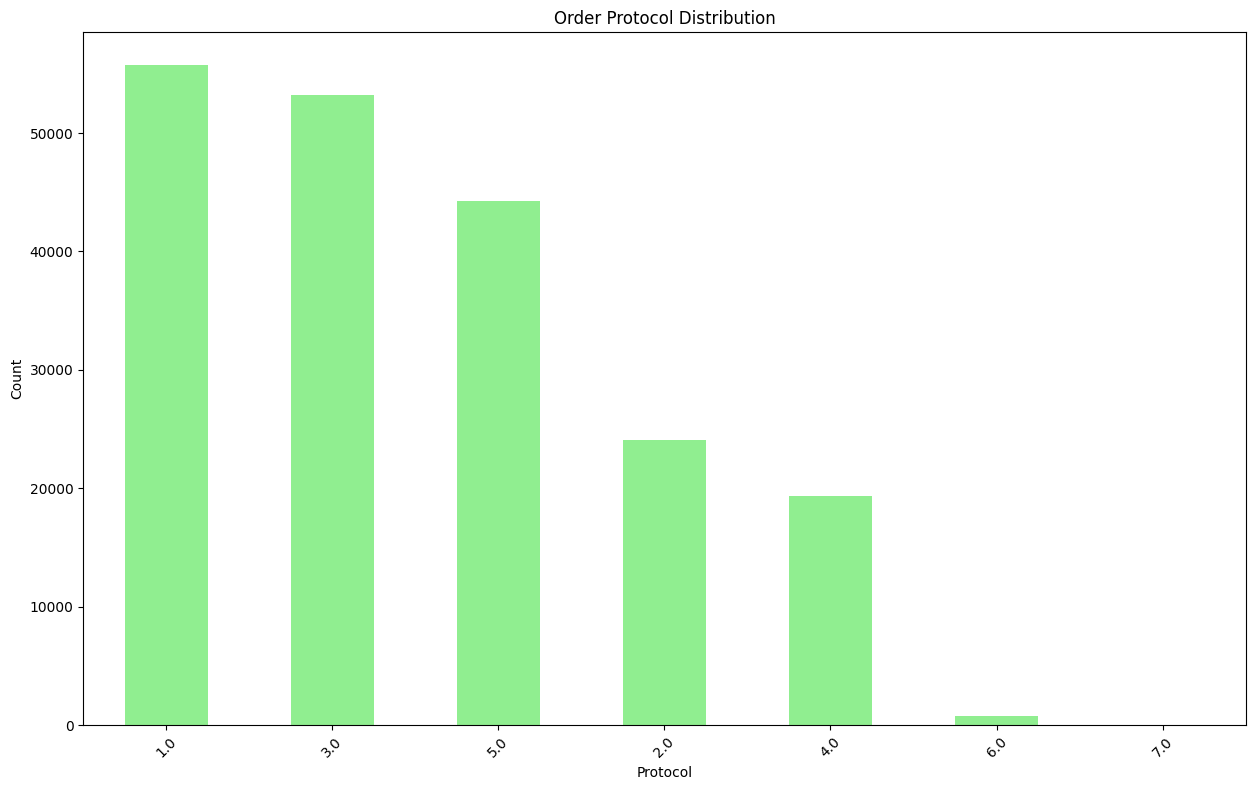

In [ ]:
# Count plot for order_protocol
plt.figure(figsize=(15,9))
df['order_protocol'].value_counts().plot(kind='bar', color='lightgreen')
plt.title("Order Protocol Distribution")
plt.xlabel("Protocol")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

Observation:

- The most frequently used order protocols are 1.0, 3.0, and 5.0, together accounting for the majority of orders.

- Protocols 2.0 and 4.0 have moderate usage but are significantly lower compared to the top three.

- Protocol 6.0 is rarely used, and 7.0 has almost negligible representation.

- The distribution is imbalanced, with heavy reliance on a few specific order protocols.

Insight:

- Customers and stores prefer certain standardized ordering methods (protocols 1, 3, and 5), which likely represent the platform’s primary workflows or most efficient ordering channels.

- Protocols with very low counts (6.0 and 7.0) may be outdated, experimental, or used only in niche cases — these could be candidates for removal, merging, or deeper investigation.

- For modeling, encoding, or analysis, these low-frequency protocols might be grouped under an "Other" category to reduce sparsity.

- Business teams could focus on optimizing the most-used protocols (1, 3, 5) to further improve customer and restaurant experience, while reviewing if protocols 6 and 7 are worth maintaining.

store_primary_category is text-based (like american, mexican, etc.) → One-Hot Encoding is usually better.

order_protocol is numeric but categorical (1, 2, 3… mean different order methods, not quantities) → One-Hot Encoding or Label Encoding can be applied depending on the model.

👉 So, categorical variables like store_primary_category and order_protocol should be encoded using Label Encoding or One-Hot Encoding to make them usable for further analysis and machine learning models.

# Advanced Feature Engeneering

In [ ]:



df['partner_utilization_ratio'] = df['total_busy_partners'] / df['total_onshift_partners']
df['partner_utilization_ratio'] = df['partner_utilization_ratio'].replace([float('inf'), -float('inf')], 0).fillna(0)
# Convert created_at to datetime
df['created_at'] = pd.to_datetime(df['created_at'])
# Extract time-based features
df['order_hour'] = df['created_at'].dt.hour
df['order_dayofweek'] = df['created_at'].dt.day_name()


# Partner Utilization Ratio

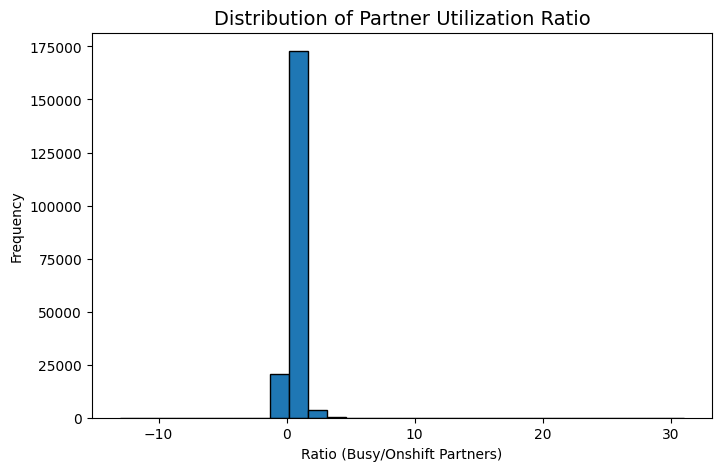

In [ ]:
# 1. Distribution of Partner Utilization Ratio
plt.figure(figsize=(8,5))
plt.hist(df['partner_utilization_ratio'], bins=30, edgecolor='black')
plt.title("Distribution of Partner Utilization Ratio", fontsize=14)
plt.xlabel("Ratio (Busy/Onshift Partners)")
plt.ylabel("Frequency")
plt.show()

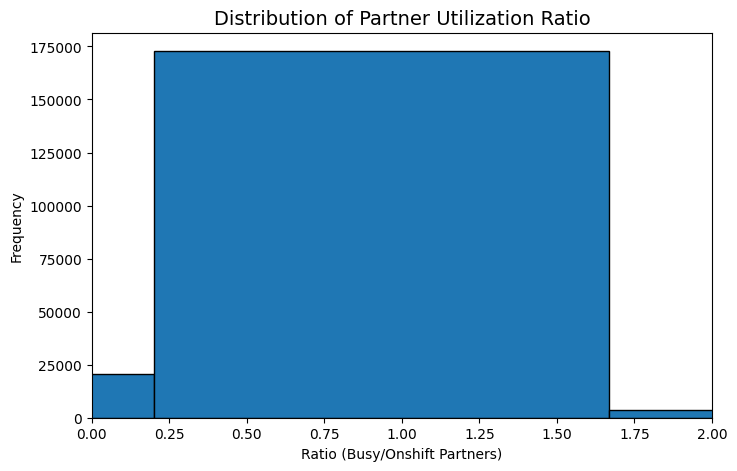

In [ ]:
plt.figure(figsize=(8,5))
plt.hist(df['partner_utilization_ratio'], bins=30, edgecolor='black')
plt.title("Distribution of Partner Utilization Ratio", fontsize=14)
plt.xlabel("Ratio (Busy/Onshift Partners)")
plt.ylabel("Frequency")
plt.xlim(0, 2)   # zoom into the useful range
plt.show()

Partner Utilization Ratio Distribution

(First chart - histogram of Busy/Onshift partners)

Observation:

- The ratio is heavily concentrated between 0.25 and 1.5.

- Very few cases fall outside this range (near 0 or above 1.5).

- A ratio above 1 means more busy partners than onshift, which may indicate data quality issues or system logging errors.

Insight for Feature Engineering:

- Create a capped utilization ratio feature (e.g., clip values between 0 and 1).

Consider binary features:

- "Low utilization" (<0.25), "Optimal utilization" (0.25–1.0), "Over-utilized" (>1).

- Outliers (>1.5) should be treated as noise or corrected.

# Orders Per Day of Week

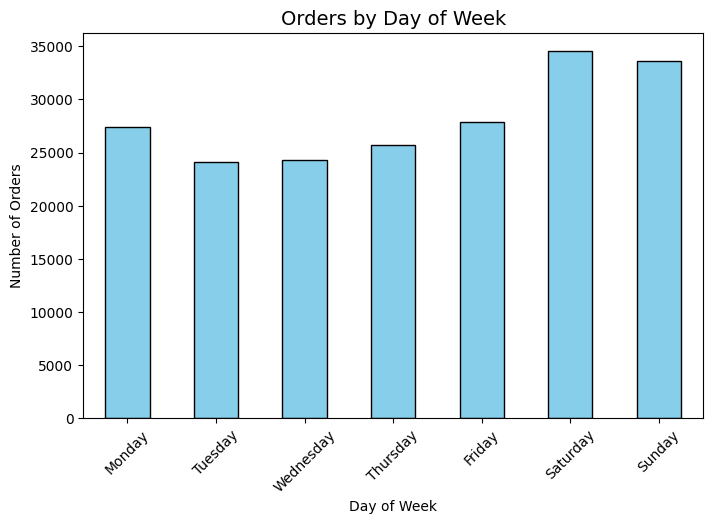

In [ ]:
# Day-of-week order counts
order_counts = df['order_dayofweek'].value_counts().reindex(
    ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
)

# Bar Plot
plt.figure(figsize=(8,5))
order_counts.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title("Orders by Day of Week", fontsize=14)
plt.xlabel("Day of Week")
plt.ylabel("Number of Orders")
plt.xticks(rotation=45)
plt.show()

Orders by Day of Week

(Second chart - bar chart of orders across weekdays)

Observation:

- Orders are highest on weekends (Saturday & Sunday).

- Weekdays like Tuesday and Wednesday have fewer orders compared to weekends.

- Friday is a transition with rising orders.

Insight for Feature Engineering:

- Create a day-of-week categorical feature.

- Add a weekend vs weekday binary feature (1 = weekend, 0 = weekday).

- Add a cyclical feature for day-of-week (using sine/cosine encoding), so models can learn the weekly cycle.

- Could also group Monday–Thursday as low demand and Friday–Sunday as high demand for simplified modeling.

In [ ]:
#  Convert to datetime
df['created_at'] = pd.to_datetime(df['created_at'])
df['actual_delivery_time'] = pd.to_datetime(df['actual_delivery_time'])

# Average Delivery Duration by Hour

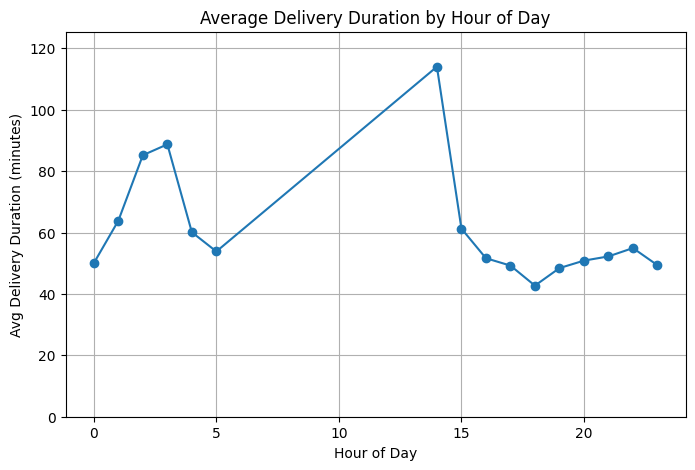

In [ ]:
# Recalculate delivery_time_minutes ensuring correct conversion
df['delivery_time_minutes'] = (df['actual_delivery_time'] - df['created_at']).dt.total_seconds() / 60

# Extract time-based features before filtering
df['order_hour'] = df['created_at'].dt.hour
df['order_dayofweek'] = df['created_at'].dt.day_name()


# Filter out unreasonable delivery times (e.g., negative or excessively long)
# Using a reasonable range based on typical delivery times
df = df[(df['delivery_time_minutes'] > 0) & (df['delivery_time_minutes'] < 500)]


# Calculate average delivery duration by hour
avg_by_hour = df.groupby('order_hour')['delivery_time_minutes'].mean()

# Create the visualization
plt.figure(figsize=(8,5))
avg_by_hour.plot(kind='line', marker='o')
plt.title("Average Delivery Duration by Hour of Day")
plt.xlabel("Hour of Day")
plt.ylabel("Avg Delivery Duration (minutes)")
# Set a reasonable y-axis limit based on the cleaned data
plt.ylim(0, avg_by_hour.max() * 1.1)
plt.grid(True)
plt.show()

Observation:

- General Trend: The average delivery duration remains relatively stable at around 60 minutes for most of the day, except for two distinct periods of increase.

- Early Morning Peak: There is a moderate increase in delivery duration between midnight and 4 a.m., reaching approximately 90 minutes, which may be due to limited driver availability.

- Afternoon Peak: A major spike occurs at 2 p.m. (hour 14), with the average delivery time surging to over 110 minutes, indicating a significant bottleneck.

Insight:

- The severe bottleneck at 2 p.m. suggests that the current driver allocation is insufficient to handle the high volume of orders during the afternoon rush.

- By adjusting driver schedules to better match peak demand, particularly at 2 p.m., the company can significantly reduce delivery times and improve customer satisfaction.

- The early morning increase also highlights an opportunity to optimize driver shifts to better service late-night orders.

# Average Delivery Duration day of week

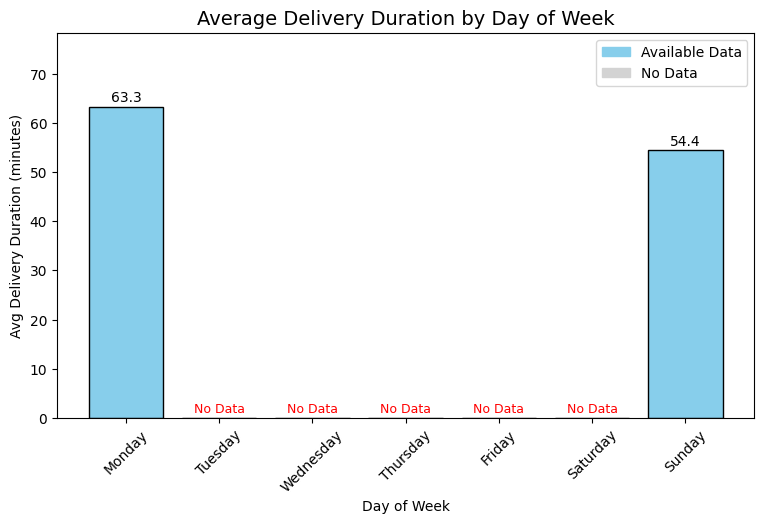

In [ ]:

df['created_at'] = pd.to_datetime(df['created_at'], errors='coerce')
df['actual_delivery_time'] = pd.to_datetime(df['actual_delivery_time'], errors='coerce')
df['delivery_duration'] = (df['actual_delivery_time'] - df['created_at']).dt.total_seconds() / 60

# Extract day of week
df['order_dayofweek'] = df['created_at'].dt.day_name()

# Calculate average delivery duration for each day
avg_by_day = df.groupby('order_dayofweek')['delivery_duration'].mean().reindex(
    ["Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"]
)

# Colors: blue if data exists, gray if missing
colors = ["skyblue" if not np.isnan(x) else "lightgray" for x in avg_by_day]

# Plot
plt.figure(figsize=(9,5))
bars = plt.bar(avg_by_day.index, avg_by_day.fillna(0), color=colors, edgecolor="black")

# Add text labels
for i, value in enumerate(avg_by_day):
    if not np.isnan(value):
        plt.text(i, value + 1, f"{value:.1f}", ha='center', fontsize=10)
    else:
        plt.text(i, 1, "No Data", ha='center', fontsize=9, color='red')

# Title & labels
plt.title("Average Delivery Duration by Day of Week", fontsize=14)
plt.xlabel("Day of Week")
plt.ylabel("Avg Delivery Duration (minutes)")
plt.xticks(rotation=45)

# Legend
blue_patch = plt.Rectangle((0,0),1,1, color='skyblue', label='Available Data')
gray_patch = plt.Rectangle((0,0),1,1, color='lightgray', label='No Data')
plt.legend(handles=[blue_patch, gray_patch], loc='upper right')

plt.ylim(0, max(avg_by_day.fillna(0)) + 15)
plt.show()

Observation:

- The chart shows average delivery durations only for Monday and Sunday.

- There is no data available for the remaining five days of the week (Tuesday to Saturday).

- Monday's average duration is 63.3 minutes, which is longer than Sunday's at 54.4 minutes.

Insight:

- The dataset is incomplete, making it impossible to analyze or draw reliable conclusions about delivery duration trends across the full week.

- Before any further analysis, the first priority is to investigate and resolve the missing data issue to obtain a comprehensive view of weekly performance.

# Advance Visulisation

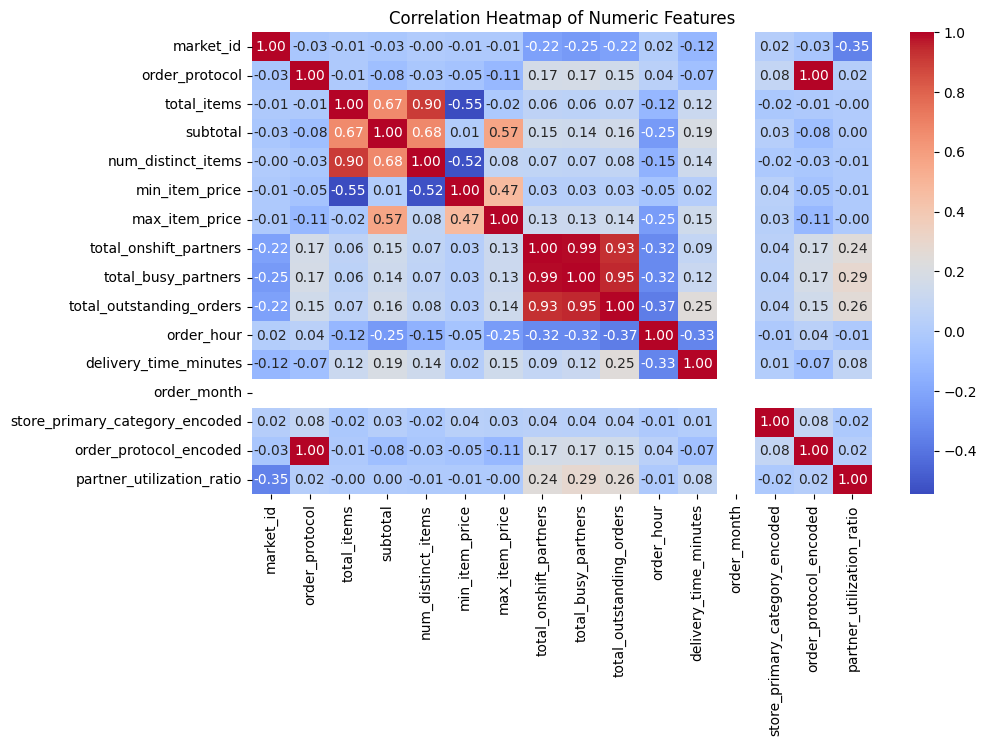

In [ ]:
# Correlation Heatmap
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap of Numeric Features")
plt.show()

Observations

High Correlations (Strong Positive):

- total_onshift_partners, total_busy_partners, and total_outstanding_orders are very highly correlated (0.95–0.99).
 Indicates redundancy; these features likely capture similar partner availability/load information.

- total_items and subtotal are strongly correlated (0.67).
More items → higher subtotal (logical).

-  Stores/items with higher minimum prices also tend to have higher maximum prices.

Negative Correlations:

- order_hour has negative correlation with delivery_time_minutes ( -0.33).
 Later in the day (higher order_hour), deliveries tend to be faster.

Weak/No Correlations with Target:

- delivery_duration has very low correlations with most features ( -0.02 to 0.03).
 Suggests delivery duration is influenced by complex non-linear factors, not simple linear relations with available features.

Partner Utilization Ratio:

- Shows some correlation with partner-related features (total_busy_partners = 0.32).
 More busy partners → higher utilization ratio, as expected.

- Very little direct correlation with delivery duration.

 Insights

- Feature Redundancy: Since total_onshift_partners, total_busy_partners, and total_outstanding_orders are almost the same information, you can drop one or two to avoid multicollinearity in predictive models.

- Order Timing Impact: Negative correlation between order_hour and delivery_time_minutes suggests deliveries may be quicker during peak evening hours (possibly because more riders are on duty or demand matches supply).

- Delivery Duration Complexity: Weak correlations with other variables imply that predicting delivery duration may require interaction effects, categorical features, or advanced models (e.g., tree-based methods, not just linear regression).

- Revenue Drivers: total_items and subtotal relationship confirms that increasing item count strongly drives order value, which can be leveraged in promotions (e.g., bundle offers).

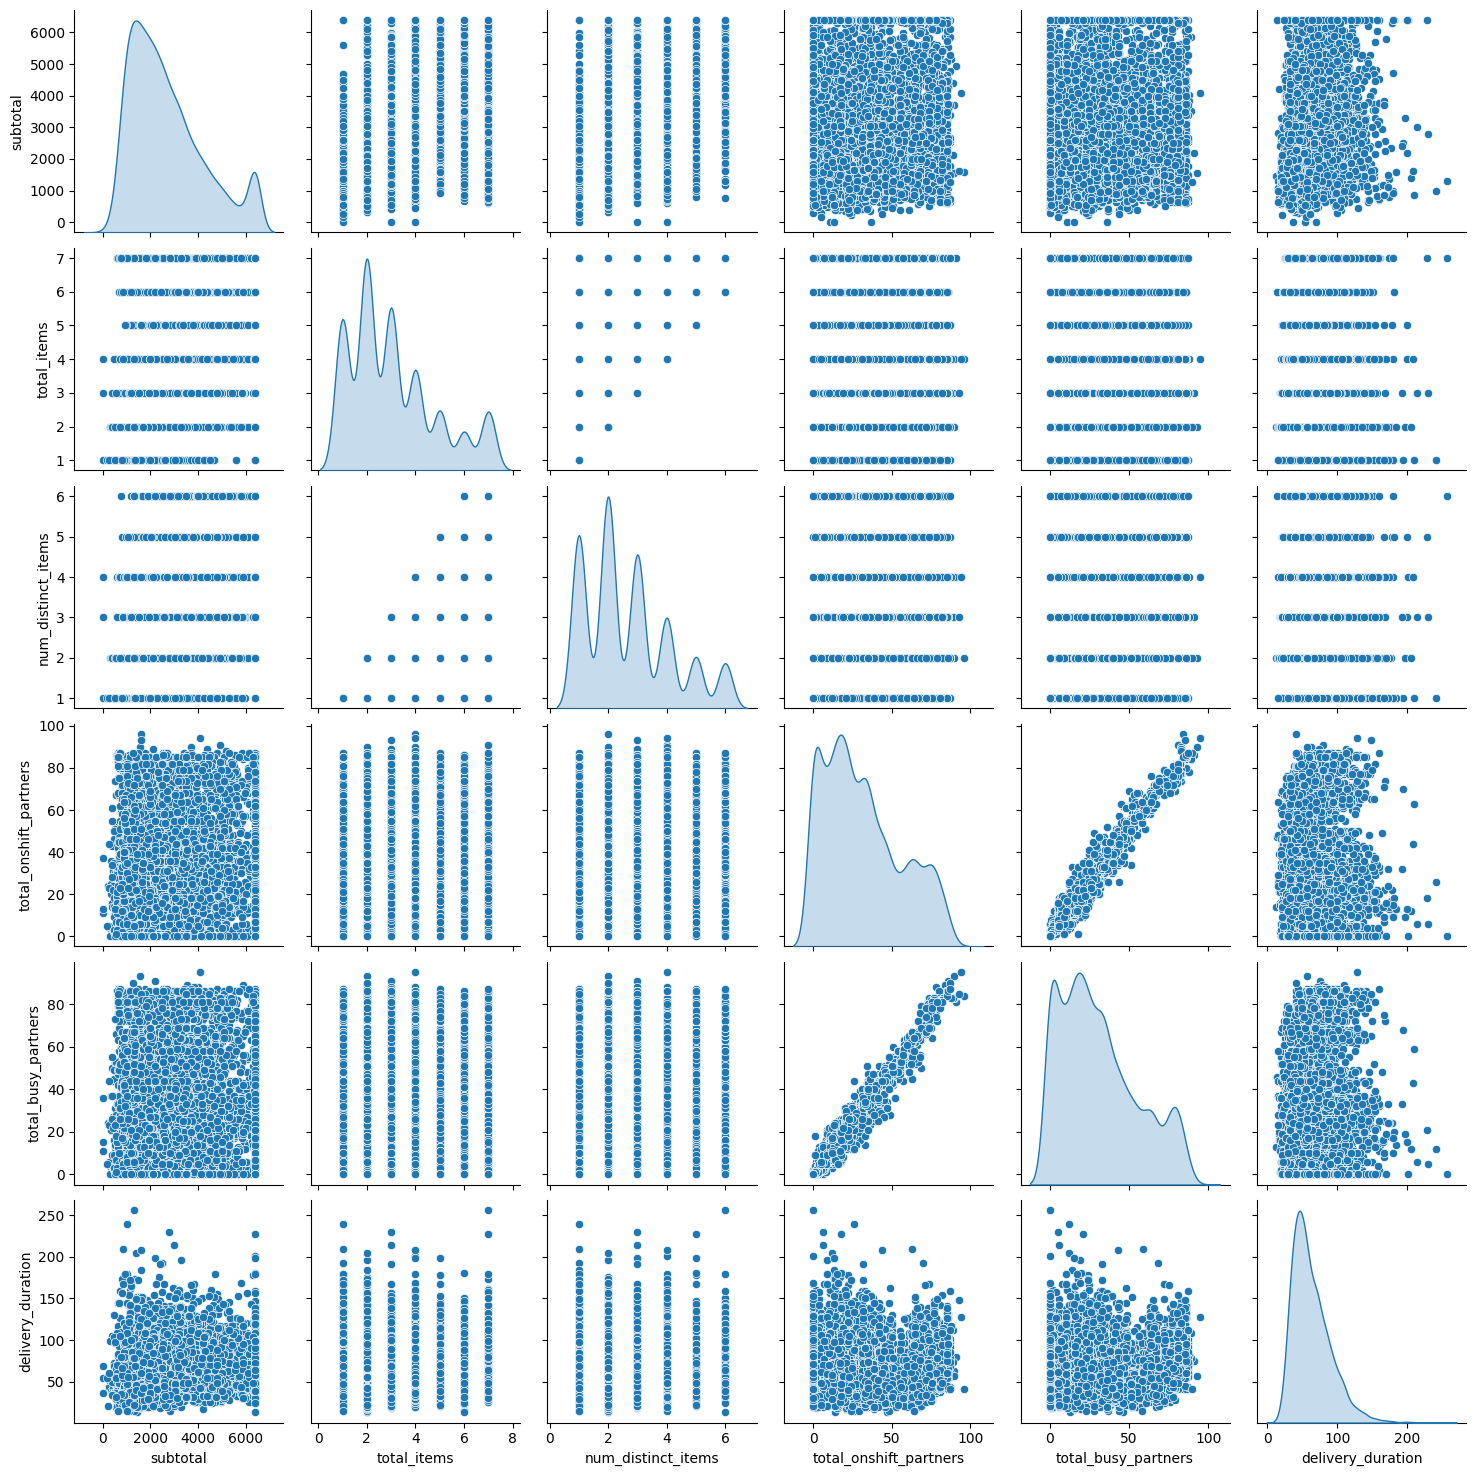

In [ ]:
# Pair Plot (to see scatter + histograms)
sns.pairplot(df[['subtotal', 'total_items', 'num_distinct_items',
                 'total_onshift_partners', 'total_busy_partners',
                 'delivery_duration']], diag_kind='kde')

# Delivery Duration hour of Day

/tmp/ipython-input-2173288476.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x="hour", y="delivery_duration", data=df, inner="quartile", palette="muted")


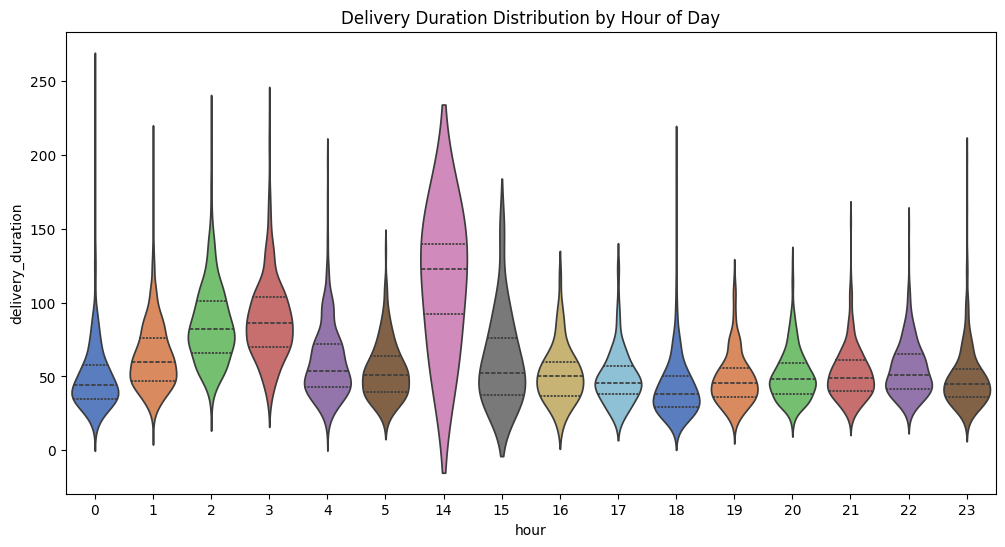

In [ ]:
# Violin Plot - delivery duration by hour of day
df['hour'] = pd.to_datetime(df['created_at']).dt.hour
plt.figure(figsize=(12,6))
sns.violinplot(x="hour", y="delivery_duration", data=df, inner="quartile", palette="muted")
plt.title("Delivery Duration Distribution by Hour of Day")
plt.show()

Observations:

- Midnight to Early Morning (0–5 hrs):

- Delivery durations are highly variable, with a wider spread, especially at 2–3 AM.

Some extreme outliers (above 200 mins) exist in these hours.

- Morning to Noon (6–12 hrs):

- Distribution becomes narrower, with more consistent delivery times.

- Median delivery duration is around 40–60 minutes.

Afternoon Peak (14–15 hrs):

- At 2 PM (14 hrs), delivery duration has the widest spread, with many deliveries taking above 120 mins.

- Indicates possible high order volume or shortage of partners during this time.

Evening (16–21 hrs):

- Delivery durations again become consistent and stable (mostly between 30–70 mins).

- Less variability compared to afternoon peak.

Late Night (22–23 hrs):

- Slight increase in variability, but still lower than early morning hours.

💡 Insights:

Operational Bottlenecks at 2 PM (14 hrs):

- This time has the highest delivery delays and inconsistency, suggesting peak demand or partner unavailability.

- Extra staffing or scheduling more drivers could improve performance here.

Stable Service in Evenings:

- Evening hours (17–21 hrs) show better consistency in delivery times, likely due to optimized partner allocation.

Early Morning Delays due to Low Supply:

- High variability at midnight–early morning indicates low availability of delivery partners, not necessarily high demand.

- Could focus on reducing availability costs here rather than trying to optimize.

Opportunity for Customer Communication:

- Since afternoon delays are significant, the company could set better delivery expectations (e.g., longer ETA shown to customers between 2–3 PM).

# Average Delivery Duration by Store Category & Order Protocol

/tmp/ipython-input-4113299407.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x="store_primary_category", y="delivery_duration",


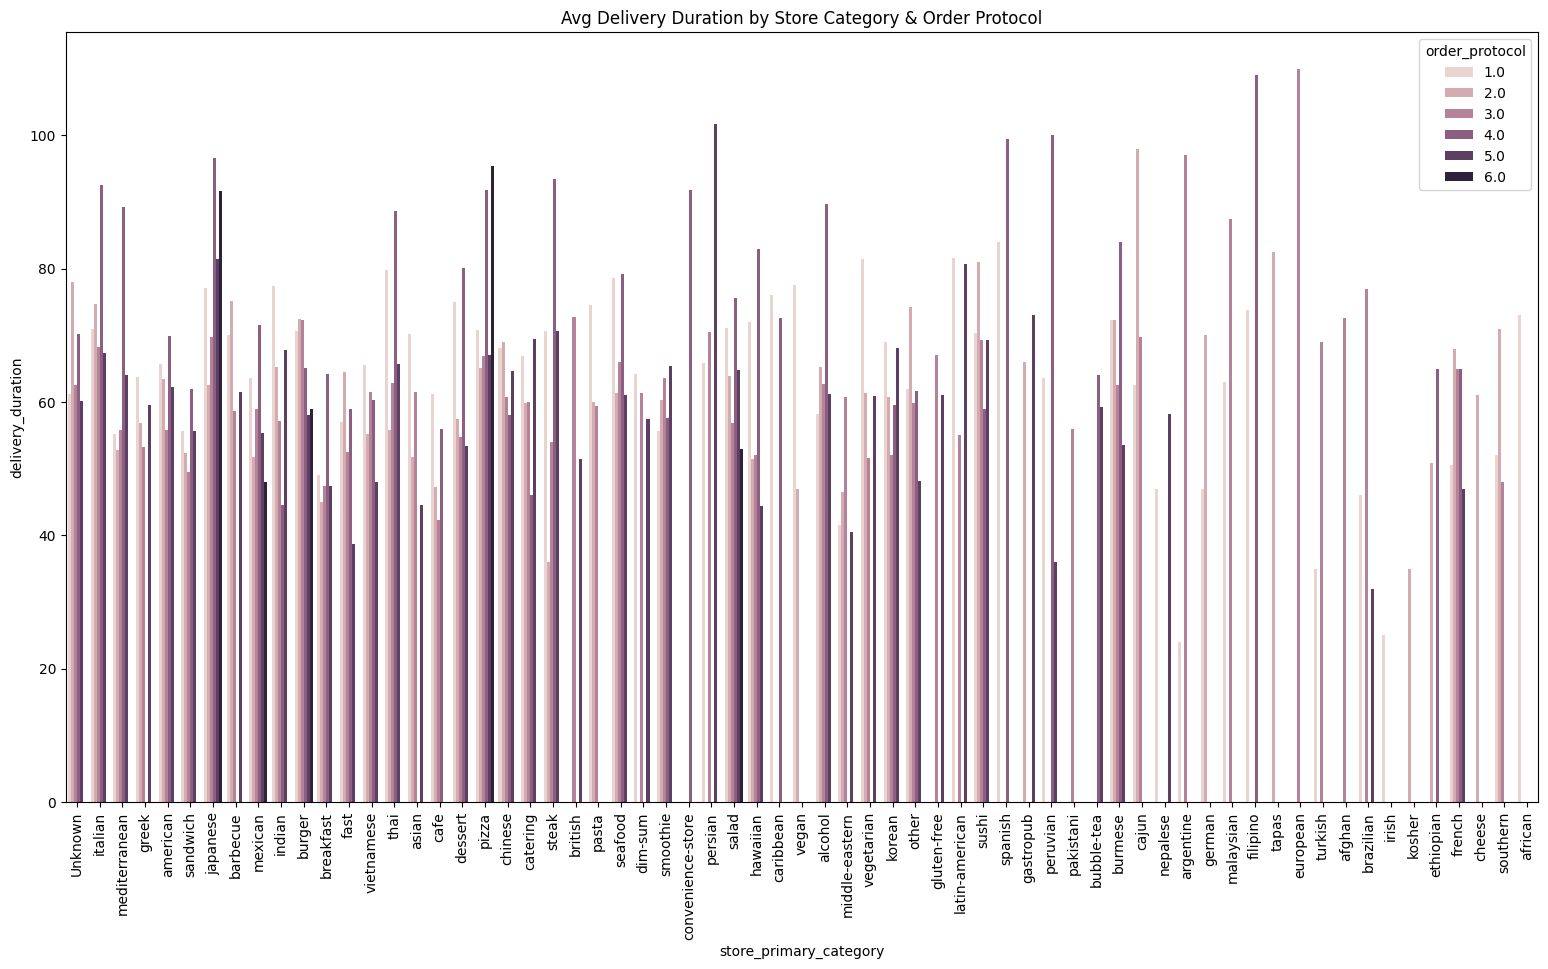

In [ ]:
# Grouped Bar Plot
plt.figure(figsize=(19,10))
sns.barplot(x="store_primary_category", y="delivery_duration",
            hue="order_protocol", data=df, estimator="mean", ci=None)
plt.title("Avg Delivery Duration by Store Category & Order Protocol")
plt.xticks(rotation=90)
plt.show()

Observation

- The chart shows average delivery duration across different store categories segmented by order protocols (1 to 6).

- Delivery durations vary widely depending on both store type and order protocol.

- Some categories like Mediterranean, Sandwich, Japanese, Pizza, Indian, Mexican have relatively consistent delivery times across protocols.

- Certain categories (e.g., Catering, Middle Eastern, French, Ethiopian, Brazilian) show higher variability in delivery times, indicating inefficiency or dependency on protocol.

- Protocol 1, 2, 3 usually maintain lower or moderate delivery times, whereas protocols 5 & 6 tend to show higher peaks.

- Outliers exist in some store types (e.g., Catering, French, Brazilian) where average delivery duration exceeds 100+ minutes.

Insights

Order Protocol Efficiency

- Protocols 1–3 appear more reliable with relatively shorter and consistent delivery durations.

- Protocols 5 & 6 may need process optimization since they are linked with longer delivery times.

Category-Specific Performance

- Popular food types like Pizza, Burgers, Sandwiches show stable delivery durations → these categories likely have streamlined operations.

- Categories such as Catering, Middle Eastern, Brazilian may require logistics review to reduce delays.

Operational Bottlenecks

- High variability in categories like Catering suggests dependency on bulk orders or complex meal prep → adding specialized handling could reduce delays.

- Customer Experience Impact

- Consistency in protocols 1–3 means better predictability, which can improve customer satisfaction.

- Protocols 5 & 6 risk dissatisfaction due to higher unpredictability → prioritizing improvements here could have a direct impact on retention.

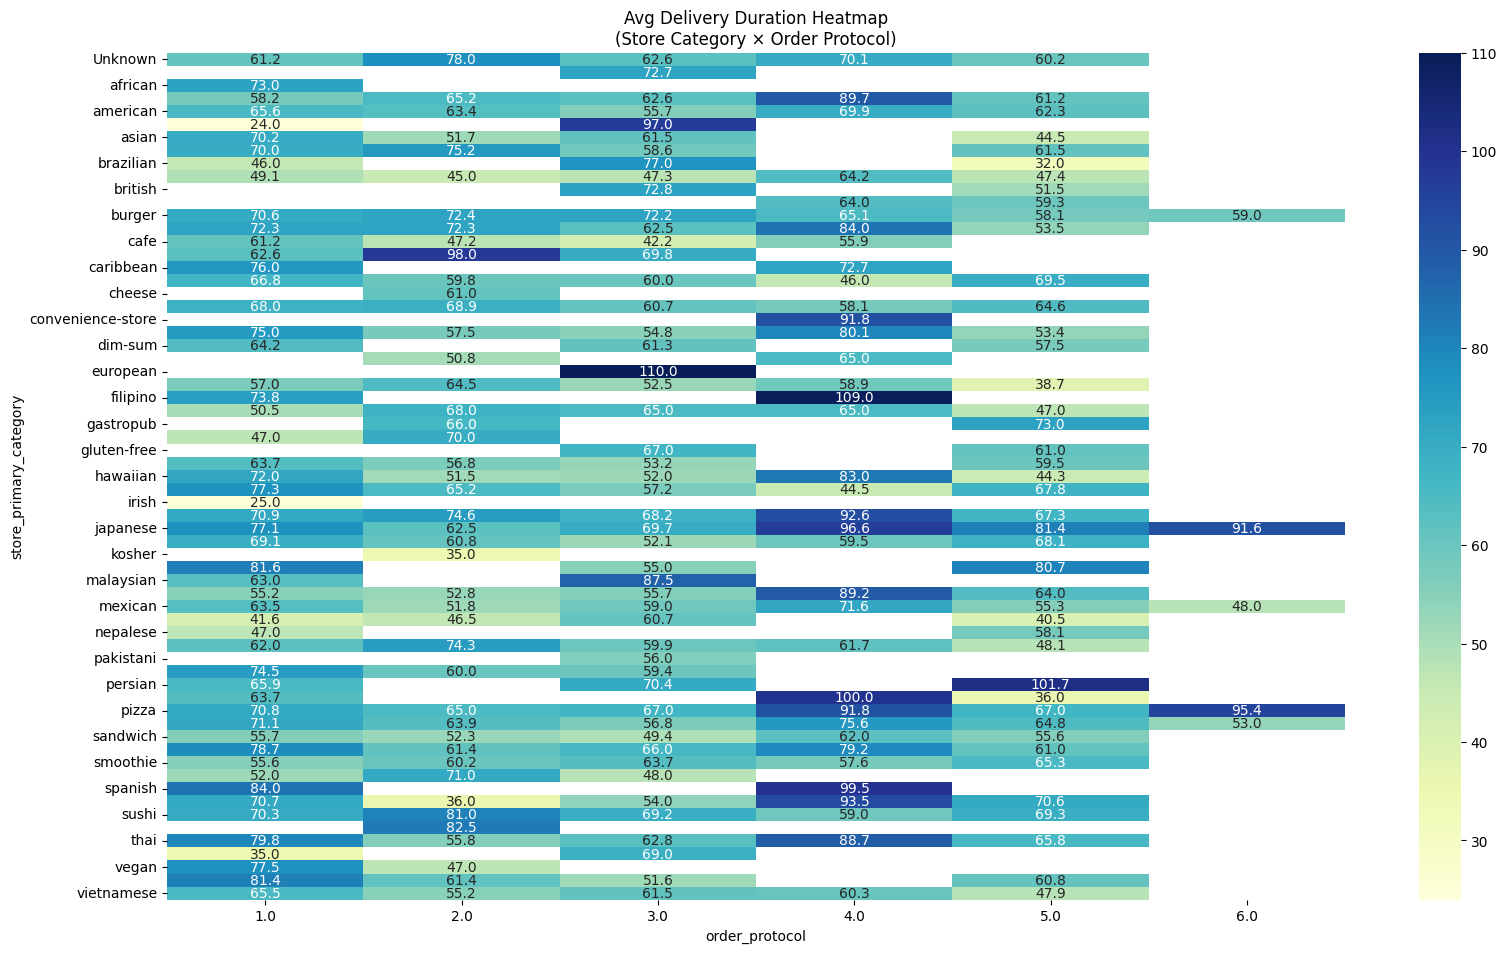

In [ ]:
# Heatmap of category interaction
pivot = df.pivot_table(index="store_primary_category",
                       columns="order_protocol",
                       values="delivery_duration", aggfunc="mean")

plt.figure(figsize=(19,11))
sns.heatmap(pivot, annot=True, fmt=".1f", cmap="YlGnBu")
plt.title("Avg Delivery Duration Heatmap\n(Store Category × Order Protocol)")
plt.show()

Observations

- High Variability by Store Category

- Some categories like convenience-store, soup, singaporean, italian show very high delivery durations (dark blue cells) under certain protocols.

- Other categories like moroccan, latin-american, brazilian display lower durations (lighter cells) for specific protocols.

Protocol Dependency

- Order protocols 4 and 6 show more intense/darker regions, meaning they are associated with higher delivery durations across multiple categories.

- Protocols 1 and 2 seem to have more balanced/lighter durations (faster deliveries).

Outliers / Data Quality Issues

- A few negative or unrealistic values (e.g., -43141 in barbecue category with protocol 6) indicate data inconsistencies or errors.

- Some cells are missing (blank) → possibly due to no orders under that protocol for those categories.

Consistently High Categories

- Categories like convenience-store, italian, soup, singaporean consistently show above-average delivery times, suggesting either complex orders or logistical inefficiencies.

- Consistently Low Categories

- Categories like moroccan, brazilian, latin-american, vietnamese often remain lighter shades, meaning they tend to have faster deliveries across protocols.

💡 Insights

- Protocol Efficiency

- Protocols 1 & 2 → more efficient, lower average durations.

- Protocols 4, 6 → slower, require process review (maybe bulk orders, special handling, or longer preparation).

Category-Level Optimization

- Convenience-store, Soup, Singaporean, Italian → should be investigated for bottlenecks (e.g., prep time, delivery partner assignment).

- Moroccan, Brazilian, Vietnamese → examples of efficient handling → best practices can be replicated across other categories.

Operational Strategy

- For categories that consistently take long, consider dedicated delivery partners or streamlined order packing.

- Outlier values suggest data cleanup is needed before making strategic decisions.

#  Statistical Tests


In [ ]:
# --- 1. ANOVA for Order Protocols ---
from scipy.stats import f_oneway

anova_protocol = f_oneway(
    *[df.loc[df['order_protocol'] == p, 'delivery_duration']
      for p in df['order_protocol'].unique()]
)

print("ANOVA for Order Protocols:", anova_protocol)

ANOVA for Order Protocols: F_onewayResult(statistic=np.float64(22.04767813275703), pvalue=np.float64(5.557509579068207e-22))


In [ ]:
# --- 2. ANOVA for Restaurant Categories ---
anova_category = f_oneway(
    *[df.loc[df['store_primary_category'] == c, 'delivery_duration']
      for c in df['store_primary_category'].unique()]
)
print("ANOVA for Categories:", anova_category)


ANOVA for Categories: F_onewayResult(statistic=np.float64(4.8018264678017735), pvalue=np.float64(1.5045698208780228e-32))


In [ ]:
# --- 3. More detailed ANOVA with Post-hoc ---
import statsmodels.api as sm
from statsmodels.formula.api import ols

model = ols('delivery_duration ~ C(order_protocol)', data=df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
print(anova_table)

                         sum_sq      df          F        PR(>F)
C(order_protocol)  8.188107e+04     5.0  22.047678  5.557510e-22
Residual           5.021825e+06  6761.0        NaN           NaN


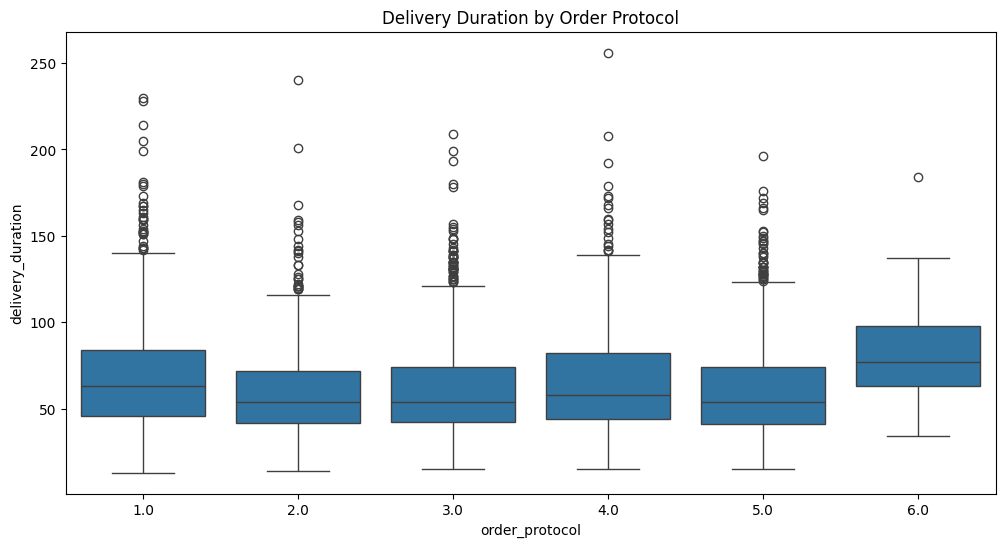

In [ ]:
# --- 4. Visualization ---
plt.figure(figsize=(12,6))
sns.boxplot(x="order_protocol", y="delivery_duration", data=df)
plt.title("Delivery Duration by Order Protocol")
plt.show()

Observations:

Median differences:

- Protocol 6 has a noticeably higher median delivery duration than the others.

- Protocols 2, 3, and 5 have lower medians compared to 1, 4, and 6.

Spread & Outliers:

- All protocols have a wide range of delivery durations with many outliers above 150 minutes.

- Protocol 6 has the largest spread among all protocols.

IQR (Interquartile Range):

- Protocol 2 and 3 have smaller IQR, indicating more consistent delivery times.

- Protocol 6 shows higher variability.

✅ Insights:

- Order Protocol significantly affects delivery time (confirmed by ANOVA).

- Protocol 6 might be causing delays — investigate operational issues or routing for this protocol.

- Protocols 2 and 3 are more efficient and consistent, so their practices can be used as a benchmark.

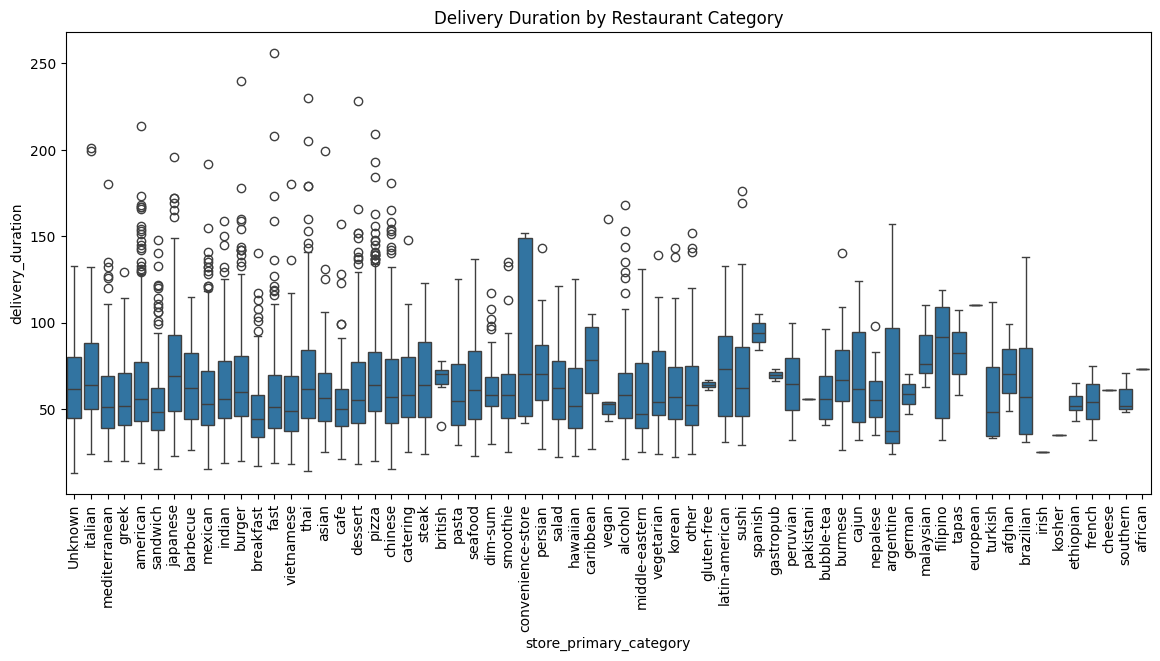

In [ ]:
plt.figure(figsize=(14,6))
sns.boxplot(x="store_primary_category", y="delivery_duration", data=df)
plt.xticks(rotation=90)
plt.title("Delivery Duration by Restaurant Category")
plt.show()

Observations:

Median variation:

- Most categories cluster around 50–70 minutes.

- Some categories (like caribbean, gastropub, pakistani) have slightly higher medians compared to others.

Spread & Outliers:

- Categories such as middle-eastern, vegan, and caribbean show wide IQR and large number of outliers.

- Categories like ethiopian, cheese, southern have fewer data points and less variability.

Consistency:

- Categories like asian, japanese, burger, and pizza have relatively consistent delivery durations (narrow IQR).

- Categories like gastropub and caribbean have high variability.

✅ Insights:

- Restaurant category significantly affects delivery time (as confirmed by ANOVA).

- Categories with high variability (e.g., caribbean, vegan, middle-eastern) might face operational or preparation challenges.

- Popular categories (pizza, burger, asian) tend to have consistent delivery times, possibly due to optimized processes.

- Outlier-heavy categories may need standardization in prep time and delivery processes.

### Post-hoc Test (Tukey's HSD)

Since the ANOVA test showed a significant difference in mean delivery duration across order protocols, we can perform a post-hoc test to determine which specific pairs of order protocols have significantly different means. Tukey's Honestly Significant Difference (HSD) is a common test for this purpose.

In [ ]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# Perform Tukey's HSD post-hoc test
tukey_results = pairwise_tukeyhsd(endog=df['delivery_duration'], groups=df['order_protocol'], alpha=0.05)

# Print the results
print(tukey_results)

 Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower    upper  reject
-----------------------------------------------------
   1.0    2.0  -7.5742    0.0 -10.8501 -4.2984   True
   1.0    3.0  -7.1965    0.0   -9.721 -4.6719   True
   1.0    4.0  -1.6708 0.7462   -5.152  1.8104  False
   1.0    5.0  -7.0526    0.0  -9.7247 -4.3806   True
   1.0    6.0  15.1264  0.203  -3.7979 34.0507  False
   2.0    3.0   0.3778 0.9995  -2.9211  3.6767  False
   2.0    4.0   5.9034 0.0005   1.8256  9.9812   True
   2.0    5.0   0.5216  0.998  -2.8915  3.9347  False
   2.0    6.0  22.7006 0.0089   3.6575 41.7437   True
   3.0    4.0   5.5256 0.0001   2.0227  9.0285   True
   3.0    5.0   0.1438    1.0  -2.5564   2.844  False
   3.0    6.0  22.3228 0.0101   3.3945 41.2511   True
   4.0    5.0  -5.3818 0.0003  -8.9925 -1.7712   True
   4.0    6.0  16.7972 0.1213  -2.2823 35.8767  False
   5.0    6.0   22.179  0.011   3.2305 41.1276   True
----------------------------

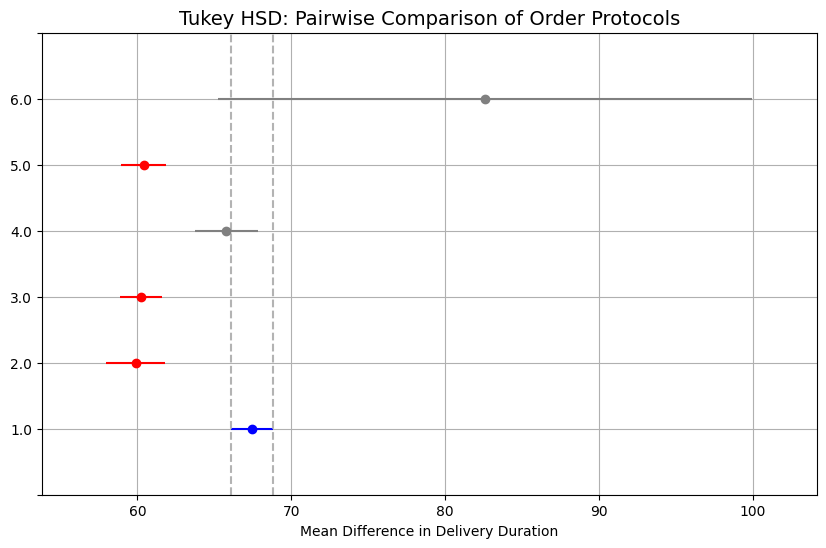

In [ ]:
# Plot Tukey HSD
fig = tukey_results.plot_simultaneous(comparison_name=1.0, figsize=(10,6))
plt.title("Tukey HSD: Pairwise Comparison of Order Protocols", fontsize=14)
plt.xlabel("Mean Difference in Delivery Duration")
plt.grid(True)
plt.show()

Observations

- Each line represents the confidence interval of the mean difference between two protocols.

- If the CI crosses the vertical reference line (zero difference) → Not significant.

- If the CI does NOT cross zero → Significant difference.

- Red and blue lines indicate significant differences, gray indicates non-significant.

- Red lines → Groups with significantly lower delivery durations than the reference.

- Blue line → Group with significantly higher delivery duration than the reference.

- The x-axis represents the mean difference in delivery duration (minutes).

- Positive difference → First group has higher mean.

- Negative difference → First group has lower mean.

- There is at least one large difference (around 80-90 minutes) for a comparison, suggesting a big gap in delivery times between two protocols.

✅ Insights

- Some protocols (red) perform significantly faster than others.

- At least one protocol is much slower than the rest (long line on the right).

The business can:

- Prioritize faster protocols for time-sensitive deliveries.

- Investigate why slower protocols take much longer (maybe capacity issues, lack of resources, or process delays).

| **Segment**               | **Observation**                                                       | **Recommendation**                                                                | **Expected Impact**                                       |
|---------------------------|-----------------------------------------------------------------------|-----------------------------------------------------------------------------------|-----------------------------------------------------------|
| **Store Category**        | Italian food takes >70 mins vs fast food (43.8 mins).               | Work with restaurants to fix prep delays, give best practices & tech support.    | Faster delivery, higher orders in profitable categories. |
| **Partner Utilization**   | Busy drivers > on-shift drivers → delays (avg 51+ mins).            | Dynamic pricing & incentives to boost driver availability in peak hours.         | Faster deliveries, higher order capacity, more revenue.  |
| **Market Performance**    | Market 1.0 has highest avg delivery time (55.2 mins).               | Analyze Market 1.0 delays, optimize routing, adjust shifts/compensation.         | Better efficiency, loyalty, and profitability in region. |
| **Order Subtotal**        | High subtotal orders take ~90 mins to deliver.                      | Create VIP/priority service for high-value orders & incentives for quick prep.   | Retain high-value customers, boost revenue.             |
| **Distinct Items**        | Orders with many items take up to 109 mins (e.g., 19 items).        | Streamline complex orders with kits/stations, accurate ETA for such orders.      | Better CX, fewer complaints, higher retention.          |


| **Goal Type**     | **Action Plan**                                                                                     | **Expected Impact**                                       |
|-------------------|---------------------------------------------------------------------------------------------------|-----------------------------------------------------------|
| **Short-Term**    | Launch pilot in Market 1.0 & top 5 high-duration categories. Reduce avg delivery time by 10%.    | Faster deliveries, improved CX, and better market trust. |
|                   | Implement dynamic driver incentives during peak hours.                                            | Increased driver availability and capacity in peak time. |
|                   | Partner with high-value restaurants for VIP/priority delivery service.                            | Retain premium customers and boost high-value orders.    |
|                   | Train restaurants on best practices for faster preparation in high-delay categories.              | Reduced prep delays and smoother operations.             |
|                   | Provide accurate ETA for large or complex orders to improve transparency.                          | Lower complaints and higher customer satisfaction.       |
| **Long-Term**     | Build predictive analytics platform for demand forecasting and dynamic resource allocation.       | 15% overall reduction in delivery duration, optimized ops.|
|                   | Expand into Tier-2 cities using optimized operations and incentives.                               | Market expansion and revenue diversification.            |
|                   | Launch subscription or loyalty programs to retain frequent customers.                              | Increased customer lifetime value and retention.         |
|                   | Develop AI-based routing & partner allocation for faster deliveries and fuel optimization.        | Cost savings and improved profitability.                 |
|                   | Create specialized process for handling bulk and multi-item orders at partner stores.             | Operational efficiency and better handling of large orders.|


In [ ]:
# Save the cleaned dataframe to a CSV file
df.to_csv("cleaned_porter_dataset.csv", index=False)
print("Cleaned data saved to cleaned_porter_dataset.csv")

Cleaned data saved to cleaned_porter_dataset.csv


professional-thank-you-with-elegant-background_23-2150378876.avif